<a href="https://colab.research.google.com/github/hetpatel007/GIS-1/blob/main/ps4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Research Interest**


In this Project ,
1) I am working to map to correlation between literacy rate and unemployment rate accross states in India
2) Relation between income and literacy rate accross states

## **Libraries**

In [1]:
import os, zipfile #basics
import pandas as pd #data management
import matplotlib.pyplot as plt #vis

import geopandas as gpd #gis/maps

#will display all output not just last command
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

from google.colab import files #to download from colab onto hd

from google.colab import data_table
data_table.enable_dataframe_formatter() #this enables spreadsheet view upon calling dataframe (without() )

In [2]:
!pip install mapclassify
import mapclassify #need for thematic map classification

## mapping your area of interest

*   In the code we found the zip file ,unzipped it and found the shape file of india ,after which we plot it.

In [3]:
! wget -q -O GIS_INDIA_MAP.zip https://drive.google.com/uc?id=1BHlY3nu1CY1eg0ULpvQDbYobmXMQaB9N&export=download
zip_ref = zipfile.ZipFile('GIS_INDIA_MAP.zip', 'r'); zip_ref.extractall(); zip_ref.close()

In [4]:
Ind = gpd.read_file('India States/Indian_states.shp')

<Axes: >

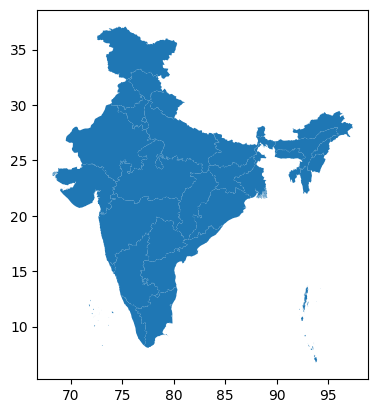

In [5]:
Ind.plot()

# **Data Types and columns in the shapefile**

In [6]:
Ind.dtypes

st_nm         object
geometry    geometry
dtype: object

In [7]:
import pandas as pd
# Rename columns using the rename() method
Ind = Ind.rename(columns={'st_nm': 'State'})

In [8]:
Ind.dtypes

State         object
geometry    geometry
dtype: object

In [9]:
Ind['State'].count()

36

In [10]:
print(Ind['State'])

0     Andaman & Nicobar Island
1           Arunanchal Pradesh
2                        Assam
3                        Bihar
4                   Chandigarh
5                 Chhattisgarh
6       Dadara & Nagar Havelli
7                  Daman & Diu
8                          Goa
9                      Gujarat
10                     Haryana
11            Himachal Pradesh
12             Jammu & Kashmir
13                   Jharkhand
14                   Karnataka
15                      Kerala
16                 Lakshadweep
17              Madhya Pradesh
18                 Maharashtra
19                     Manipur
20                   Meghalaya
21                     Mizoram
22                    Nagaland
23                NCT of Delhi
24                  Puducherry
25                      Punjab
26                   Rajasthan
27                      Sikkim
28                  Tamil Nadu
29                   Telangana
30                     Tripura
31               Uttar Pradesh
32      

In [11]:
! wget -q -O IND.zip https://drive.google.com/uc?id=1opoGF1mPFkiZwwk-rloTDRAprs2gfCn_&export=download

In [12]:
zip_ref = zipfile.ZipFile('IND.zip', 'r'); zip_ref.extractall(); zip_ref.close()
Ind_pop= gpd.read_file('INDIA-MAP.shp')

In [13]:
Ind_pop.dtypes

objectid         int64
statecode       object
statename       object
state_ut        object
distcode        object
distname        object
distarea       float64
totalpopul     float64
totalhh        float64
totpopmale     float64
totpopfema     float64
st_areasha     float64
st_lengths     float64
geometry      geometry
dtype: object

<Axes: >

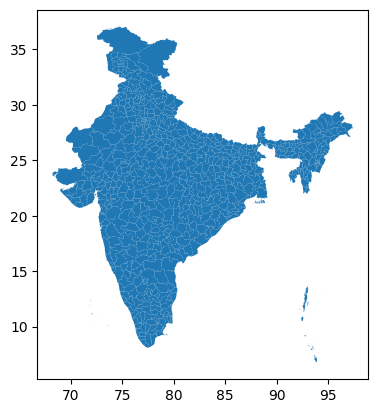

In [14]:
Ind_pop.plot()

In [15]:
states = Ind_pop.dissolve(by='statename',aggfunc='sum').reset_index()
states = states[['statename', 'distarea', 'totalpopul','totpopmale', 'totpopfema', 'geometry']]

<ipython-input-15-f69c2f827b65>:1: FutureWarning: The default value of numeric_only in aggfunc='sum' within pandas.DataFrameGroupBy.agg used in dissolve is deprecated. In pandas 2.0, numeric_only will default to False. Either specify numeric_only as additional argument in dissolve() or select only columns which should be valid for the function.
  states = Ind_pop.dissolve(by='statename',aggfunc='sum').reset_index()


<Axes: >

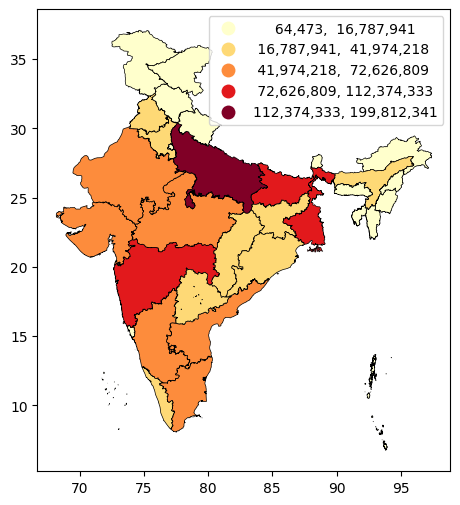

In [16]:
states.plot(figsize=(8,6),column='totalpopul',legend=True,cmap='YlOrRd',scheme='natural_breaks',k=5,
         edgecolor='black',linewidth=.5,legend_kwds= {"fmt": "{:,.0f}"})

## Unemployment in India
Map 1

In [17]:
! wget -q -O up_df.csv https://drive.google.com/uc?id=1o3dQsYfZzpAA0-gBOW3b32Evh3vjFP5d&export=download


In [18]:
df_unemp = pd.read_csv("up_df.csv")

In [19]:
df_unemp.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural


In [20]:
df_unemp.dtypes

Region                                       object
 Date                                        object
 Frequency                                   object
 Estimated Unemployment Rate (%)            float64
 Estimated Employed                         float64
 Estimated Labour Participation Rate (%)    float64
Area                                         object
dtype: object

In [21]:
df_unemp=df_unemp.rename(columns={'Region':'State'})

In [22]:
df_unemp['State'].nunique()

28

In [23]:
df_un_1 = df_unemp[['State',' Estimated Unemployment Rate (%)','Area']]     #Managing duplicates
df_un_1.head()

,State,Estimated Unemployment Rate (%),Area
0,Andhra Pradesh,3.65,Rural
1,Andhra Pradesh,3.05,Rural
2,Andhra Pradesh,3.75,Rural
3,Andhra Pradesh,3.32,Rural
4,Andhra Pradesh,5.17,Rural


In [24]:
df_un_agg=df_un_1.groupby(['State','Area'])[' Estimated Unemployment Rate (%)'].mean().reset_index()
df_un_agg.head()


,State,Area,Estimated Unemployment Rate (%)
0,Andhra Pradesh,Rural,5.526429
1,Andhra Pradesh,Urban,9.427857
2,Assam,Rural,4.490833
3,Assam,Urban,8.088571
4,Bihar,Rural,16.770000


In [25]:
#merge
#njC1 = pd.merge(njC, zil1, on='COUNTY',how='outer',indicator=True)
df_1 = pd.merge(Ind, df_un_agg, on='State',how='outer',indicator=True)

In [26]:
df_2 = pd.merge(Ind, df_un_agg, on='State',how='inner',indicator=False)

In [27]:
df_1.dtypes

State                                 object
geometry                            geometry
Area                                  object
 Estimated Unemployment Rate (%)     float64
_merge                              category
dtype: object

## Took relevant columns

In [28]:
df_1 = df_1[['State',' Estimated Unemployment Rate (%)','Area','_merge','geometry']]

In [29]:
df_1 = df_1.iloc[2:]

In [30]:
df_1.shape

(62, 5)

<Axes: >

[]

[]

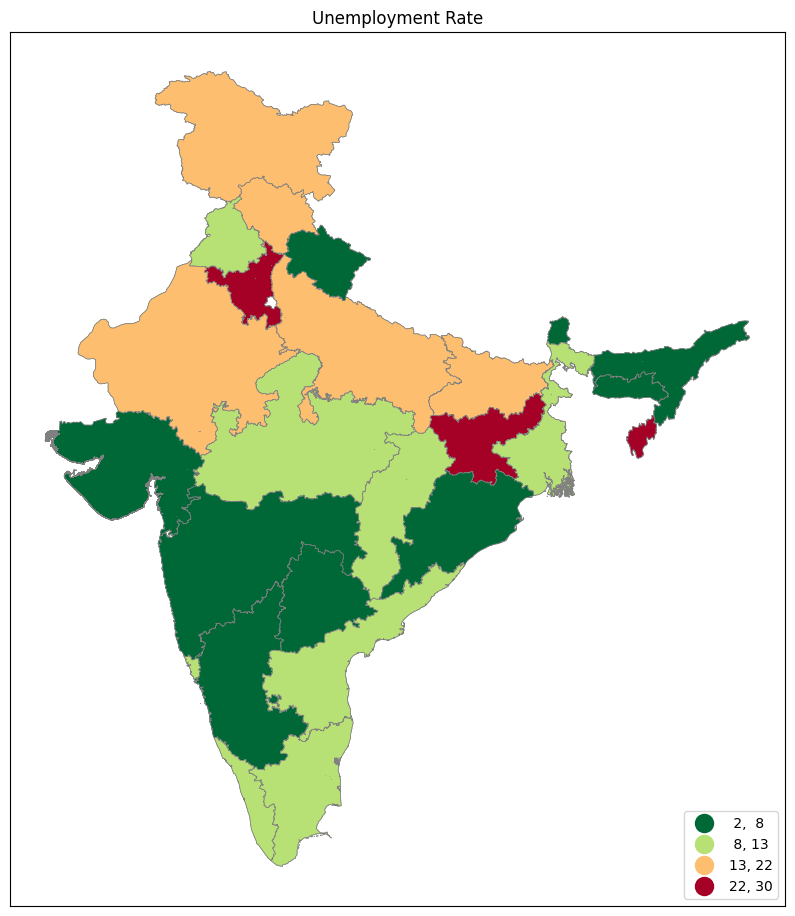

In [31]:
fig, ax = plt.subplots(1, figsize=(10,12))
df_1.plot(ax=ax,column=' Estimated Unemployment Rate (%)',legend=True,cmap='RdYlGn_r',
          scheme='natural_breaks',k=4, edgecolor='grey',linewidth=0.5,
          legend_kwds= {"fmt": "{:,.0f}",'loc':'lower right','markerscale':1.4})
leg1 = ax.get_legend()
ax.title.set_text("Unemployment Rate")
ax.set_xticks([]) #kills xticks
ax.set_yticks([]) #kills xticks

##MAP 2
Literacy rate

In [32]:
! wget -q -O lit_df.csv "https://drive.google.com/uc?id=1o9gOvKIMbAIKk5HBHGfBPh3DY617TiEW&export=download"

In [33]:
df_literacy = pd.read_csv("lit_df.csv")

In [34]:
df_literacy.head()

,Category,Country/ States/ Union Territories Name,Literacy Rate (Persons) - Total - 2019,Literacy Rate (Persons) - Total - 2019.1,Literacy Rate (Persons) - Rural - 2019,Literacy Rate (Persons) - Rural - 2019.1,Literacy Rate (Persons) - Urban - 2019,Literacy Rate (Persons) - Urban - 2019.1
0,Country,INDIA,64.8,73.0,58.7,67.8,79.9,84.1
1,State,Andhra Pradesh,60.5,67.0,54.5,60.4,76.1,80.1
2,State,Arunachal Pradesh,54.3,65.4,47.8,59.9,78.3,82.9
3,State,Assam,63.3,72.2,59.7,69.3,85.3,88.5
4,State,Bihar,47.0,61.8,43.9,59.8,71.9,76.9


In [35]:
df_literacy.dtypes

Category                                     object
Country/ States/ Union Territories Name      object
Literacy Rate (Persons) - Total - 2019      float64
Literacy Rate (Persons) - Total - 2019.1    float64
Literacy Rate (Persons) - Rural - 2019      float64
Literacy Rate (Persons) - Rural - 2019.1    float64
Literacy Rate (Persons) - Urban - 2019      float64
Literacy Rate (Persons) - Urban - 2019.1    float64
dtype: object

In [36]:
df_literacy.rename(columns= {'Country/ States/ Union Territories Name' : 'State','Literacy Rate (Persons) - Total - 2019' : 'Literacy_rate','Literacy Rate (Persons) - Rural - 2019': 'Literacy Rural','Literacy Rate (Persons) - Urban - 2019':'Literacy Urban'}, inplace=True)
df_literacy.head(10)

,Category,State,Literacy_rate,Literacy Rate (Persons) - Total - 2019.1,Literacy Rural,Literacy Rate (Persons) - Rural - 2019.1,Literacy Urban,Literacy Rate (Persons) - Urban - 2019.1
0,Country,INDIA,64.8,73.0,58.7,67.8,79.9,84.1
1,State,Andhra Pradesh,60.5,67.0,54.5,60.4,76.1,80.1
2,State,Arunachal Pradesh,54.3,65.4,47.8,59.9,78.3,82.9
3,State,Assam,63.3,72.2,59.7,69.3,85.3,88.5
4,State,Bihar,47.0,61.8,43.9,59.8,71.9,76.9
5,State,Chhattisgarh,64.7,70.3,60.5,66.0,80.6,84.0
6,State,Goa,82.0,88.7,79.7,86.6,84.4,90.0
7,State,Gujarat,69.1,78.0,61.3,71.7,81.8,86.3
8,State,Haryana,67.9,75.6,63.2,71.4,79.2,83.1
9,State,Himachal Pradesh,76.5,82.8,75.1,81.9,88.9,91.1


In [37]:
df_literacy = df_literacy.drop(df_literacy.index[0])

In [38]:
df_literacy.head(3)

,Category,State,Literacy_rate,Literacy Rate (Persons) - Total - 2019.1,Literacy Rural,Literacy Rate (Persons) - Rural - 2019.1,Literacy Urban,Literacy Rate (Persons) - Urban - 2019.1
1,State,Andhra Pradesh,60.5,67.0,54.5,60.4,76.1,80.1
2,State,Arunachal Pradesh,54.3,65.4,47.8,59.9,78.3,82.9
3,State,Assam,63.3,72.2,59.7,69.3,85.3,88.5


In [39]:
Literacy_df = pd.merge(Ind,df_literacy, on='State',how='outer',indicator=True)
#print(C1.columns)

In [40]:
Literacy_df_2 = pd.merge(Ind,df_literacy, on='State',how='inner',indicator=False)

In [41]:
Literacy_df = Literacy_df[['State','Literacy_rate','geometry','_merge','Literacy Rural','Literacy Urban']]

In [42]:
Literacy_df.shape

(39, 6)

<Axes: >

[]

[]

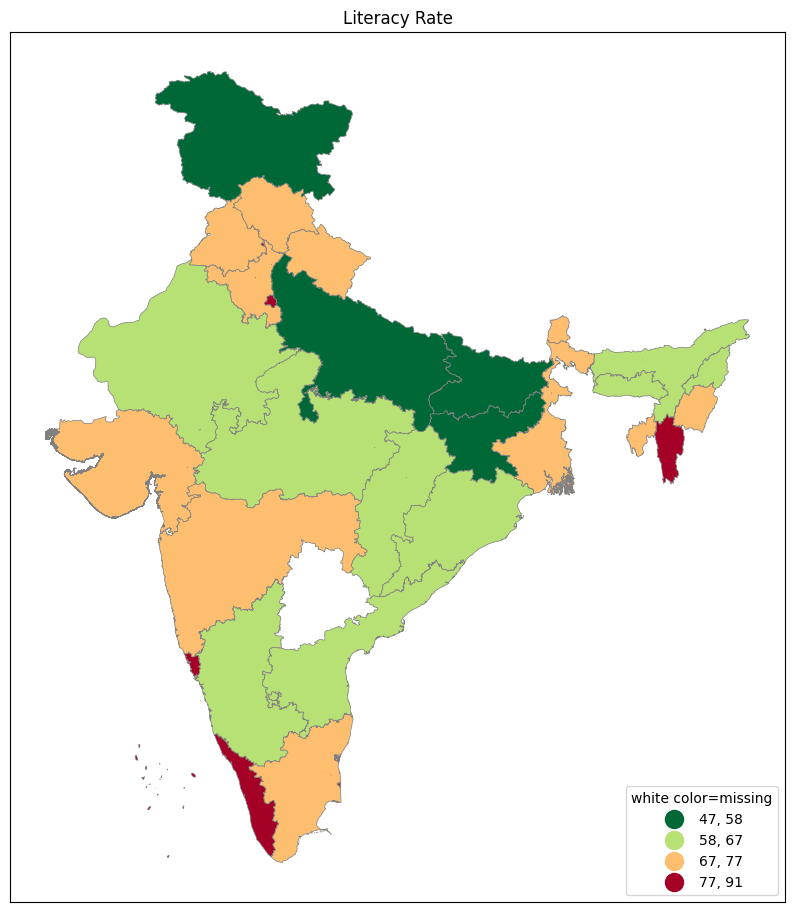

In [43]:
fig, ax = plt.subplots(1, figsize=(10,12))
Literacy_df.plot(ax=ax,column='Literacy_rate',legend=True,cmap='RdYlGn_r',
          scheme='natural_breaks',k=4, edgecolor='grey',linewidth=0.5,
          legend_kwds= {"fmt": "{:,.0f}",'loc':'lower right','markerscale':1.4})
leg1 = ax.get_legend()
leg1.set_title('''white color=missing''')
ax.title.set_text("Literacy Rate")
ax.set_xticks([]) #kills xticks
ax.set_yticks([]) #kills xticks

### SIDE BY SIDE###

<Axes: >

[]

[]

<Axes: >

[]

[]

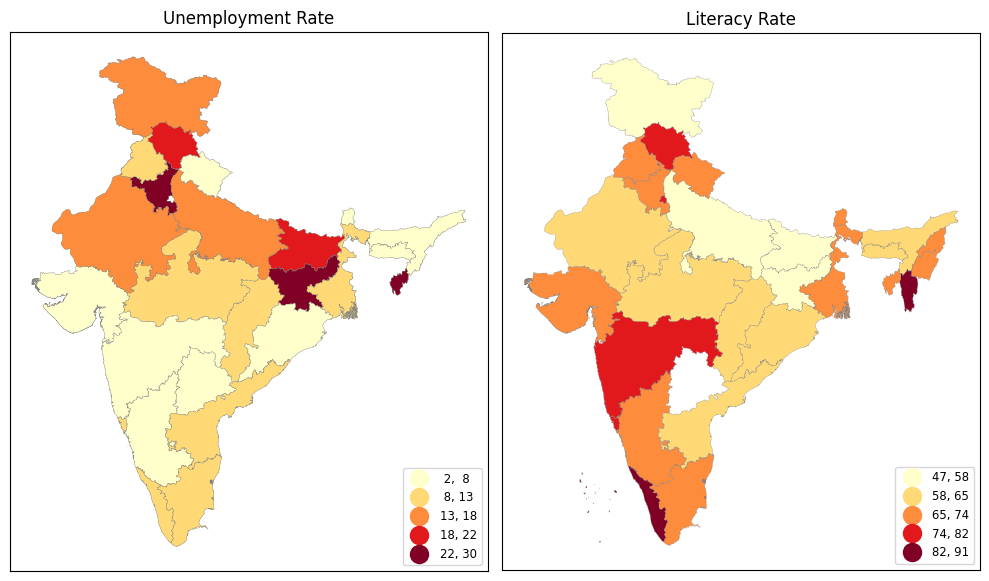

In [44]:
fig, axs = plt.subplots(1,2, figsize=(10,10),sharey=True, tight_layout=True)
df_1.plot(ax=axs[0],column=' Estimated Unemployment Rate (%)',legend=True,cmap='YlOrRd',scheme='natural_breaks',k=5,
         edgecolor='grey',linewidth=0.2,legend_kwds= {"fmt": "{:,.0f}",
        'loc':'lower right','title_fontsize':'medium','fontsize':'small','markerscale':1.4}) #
axs[0].title.set_text("Unemployment Rate")
axs[0].set_xticks([]); axs[0].set_yticks([])

Literacy_df.plot(ax=axs[1],column='Literacy_rate',legend=True,cmap='YlOrRd',scheme='natural_breaks',k=5,
         edgecolor='grey',linewidth=0.2,legend_kwds= {"fmt": "{:,.0f}",
        'loc':'lower right','title_fontsize':'medium','fontsize':'small','markerscale':1.4}) #
axs[1].title.set_text("Literacy Rate")
axs[1].set_xticks([]); axs[1].set_yticks([])


**By plotting both the maps we were able to discover correlation between literacy rate and unemployment. Majority of States with higher literacy has a lower unemployment rate and vice versa.**


### Map 3

##I tried to perform analysis in rural and urban areas

In [45]:
df_un_agg.head()

,State,Area,Estimated Unemployment Rate (%)
0,Andhra Pradesh,Rural,5.526429
1,Andhra Pradesh,Urban,9.427857
2,Assam,Rural,4.490833
3,Assam,Urban,8.088571
4,Bihar,Rural,16.770000


In [46]:
import pandas as pd
# Group by the 'column_name' column
grouped_df = df_un_agg.groupby('Area')

# Perform aggregation on the grouped data, for example, sum of 'value' for each group
sum_by_group = grouped_df[' Estimated Unemployment Rate (%)'].sum()

# Display the result
print(sum_by_group)


Area
Rural    274.453293
Urban    368.756015
Name:  Estimated Unemployment Rate (%), dtype: float64


Unemployment Rate was higher in Urban areas compared to Rural areas

### Group BY

In [47]:
df_un_agg.dtypes

State                                object
Area                                 object
 Estimated Unemployment Rate (%)    float64
dtype: object

In [48]:
import pandas as pd                                                         # Plot it
# Group by 'State' and calculate the mean of 'Estimated Unemployment Rate (%)'
grouped = df_un_agg.groupby('State')[' Estimated Unemployment Rate (%)'].sum()

print(grouped)


State
Andhra Pradesh      14.954286
Assam               12.579405
Bihar               37.836429
Chandigarh          15.991667
Chhattisgarh        18.480714
Delhi               32.990714
Goa                 18.548333
Gujarat             13.327857
Haryana             52.566429
Himachal Pradesh    37.080714
Jammu & Kashmir     32.500818
Jharkhand           41.170000
Karnataka           13.352143
Kerala              20.247857
Madhya Pradesh      14.812857
Maharashtra         15.115000
Meghalaya            9.776538
Odisha              11.315714
Puducherry          20.008333
Punjab              24.062143
Rajasthan           28.116429
Sikkim              13.233333
Tamil Nadu          18.568571
Telangana           15.475714
Tripura             56.700714
Uttar Pradesh       25.102857
Uttarakhand         13.044451
West Bengal         16.249286
Name:  Estimated Unemployment Rate (%), dtype: float64


In [49]:
# Find the maximum and minimum values and their corresponding states
max_value = grouped.max()
max_state = grouped.idxmax()

min_value = grouped.min()
min_state = grouped.idxmin()

print("Maximum value:", max_value, "in state:", max_state)
print("Minimum value:", min_value, "in state:", min_state)

Maximum value: 56.700714285714284 in state: Tripura
Minimum value: 9.776538461538461 in state: Meghalaya


### Only wanted values containing rural

In [50]:
import pandas as pd
# Define the value you want to filter by
desired_value = 'Rural'

# Create a boolean condition for filtering
condition = df_un_agg['Area'] == desired_value

# Apply boolean indexing to obtain the subset
Rural_df = df_un_agg[condition]

print(Rural_df)


               State   Area   Estimated Unemployment Rate (%)
0     Andhra Pradesh  Rural                          5.526429
2              Assam  Rural                          4.490833
4              Bihar  Rural                         16.770000
7       Chhattisgarh  Rural                          6.628571
9              Delhi  Rural                         15.258571
11               Goa  Rural                          8.390000
13           Gujarat  Rural                          5.917143
15           Haryana  Rural                         25.012857
17  Himachal Pradesh  Rural                         15.504286
19   Jammu & Kashmir  Rural                         14.951818
21         Jharkhand  Rural                         15.221429
23         Karnataka  Rural                          7.224286
25            Kerala  Rural                         10.341429
27    Madhya Pradesh  Rural                          5.653571
29       Maharashtra  Rural                          6.810000
31      

In [51]:
Rural_df.head()

,State,Area,Estimated Unemployment Rate (%)
0,Andhra Pradesh,Rural,5.526429
2,Assam,Rural,4.490833
4,Bihar,Rural,16.770000
7,Chhattisgarh,Rural,6.628571
9,Delhi,Rural,15.258571


In [52]:
import pandas as pd
# Define the value you want to check for
desired_value = 'Urban'

# Create a boolean condition for checking
is_value_present = Rural_df['Area'].str.contains(desired_value, case=False)

# Check if the value is present in the column
if is_value_present.any():
    print(f'The value {desired_value} is present in the column.')
else:
    print(f'The value {desired_value} is not present in the column.')


The value Urban is not present in the column.


In [53]:
import pandas as pd
# Define the value you want to filter by
desired_value = 'Urban'

# Create a boolean condition for filtering
condition = df_un_agg['Area'] == desired_value

# Apply boolean indexing to obtain the subset
Urban_df = df_un_agg[condition]

print(Urban_df)


               State   Area   Estimated Unemployment Rate (%)
1     Andhra Pradesh  Urban                          9.427857
3              Assam  Urban                          8.088571
5              Bihar  Urban                         21.066429
6         Chandigarh  Urban                         15.991667
8       Chhattisgarh  Urban                         11.852143
10             Delhi  Urban                         17.732143
12               Goa  Urban                         10.158333
14           Gujarat  Urban                          7.410714
16           Haryana  Urban                         27.553571
18  Himachal Pradesh  Urban                         21.576429
20   Jammu & Kashmir  Urban                         17.549000
22         Jharkhand  Urban                         25.948571
24         Karnataka  Urban                          6.127857
26            Kerala  Urban                          9.906429
28    Madhya Pradesh  Urban                          9.159286
30      

### Merge with shp file

In [54]:
Rural_df_1 = pd.merge(Ind,Rural_df, on='State',how='outer',indicator=True)


<Axes: >

[]

[]

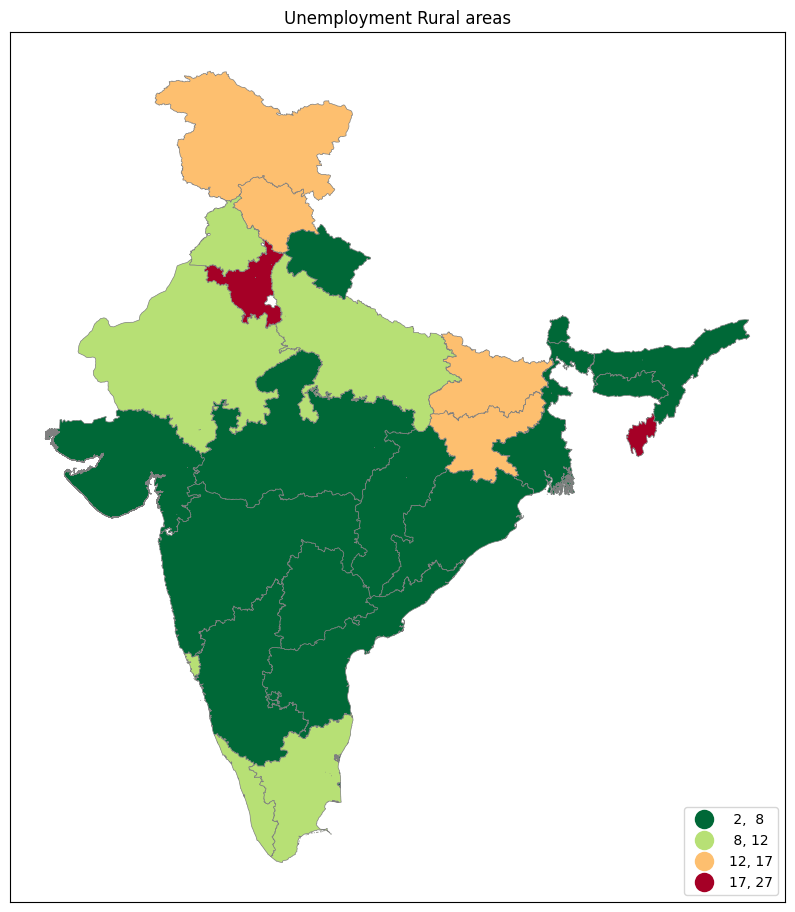

In [55]:
fig, ax = plt.subplots(1, figsize=(10,12))
Rural_df_1.plot(ax=ax,column=' Estimated Unemployment Rate (%)',legend=True,cmap='RdYlGn_r',
          scheme='naturalbreaks',k=4, edgecolor='grey',linewidth=0.5,
          legend_kwds= {"fmt": "{:,.0f}",'loc':'lower right','markerscale':1.4})
leg1 = ax.get_legend()
ax.title.set_text("Unemployment Rural areas")
ax.set_xticks([]) #kills xticks
ax.set_yticks([]) #kills xticks



In [56]:
Urban_df_1 = pd.merge(Ind, Urban_df, on='State',how='outer',indicator=True)

<Axes: >

[]

[]

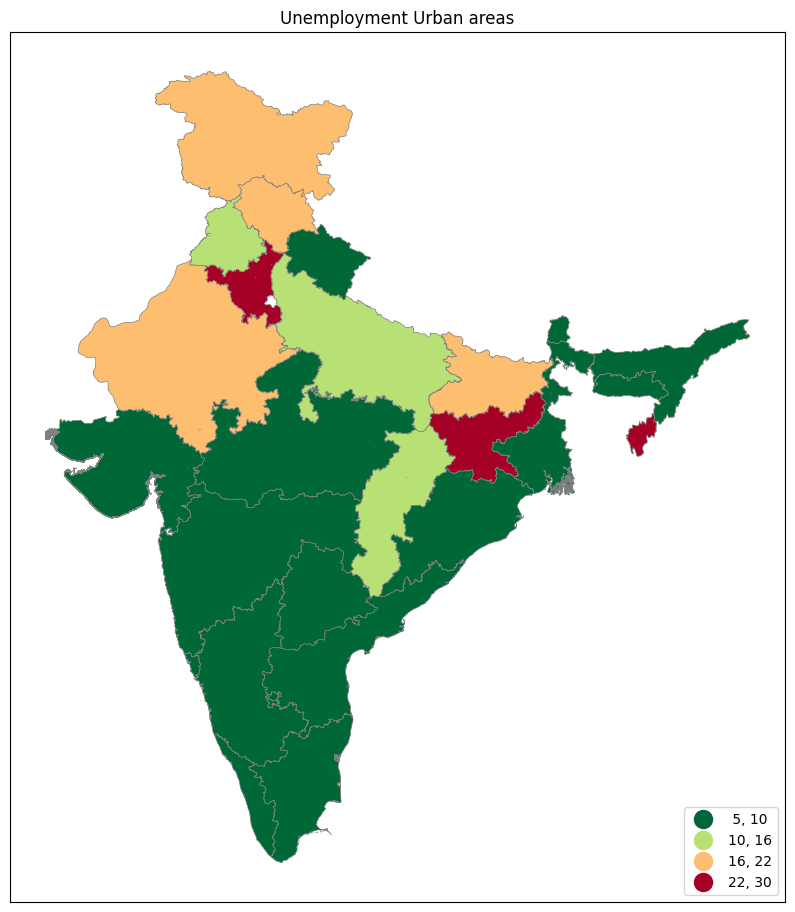

In [57]:
fig, ax = plt.subplots(1, figsize=(10,12))
Urban_df_1.plot(ax=ax,column=' Estimated Unemployment Rate (%)',legend=True,cmap='RdYlGn_r',
          scheme='naturalbreaks',k=4, edgecolor='grey',linewidth=0.5,
          legend_kwds= {"fmt": "{:,.0f}",'loc':'lower right','markerscale':1.4})
leg1 = ax.get_legend()
ax.title.set_text("Unemployment Urban areas")
ax.set_xticks([]) #kills xticks
ax.set_yticks([]) #kills xticks


<Axes: >

[]

[]

<Axes: >

[]

[]

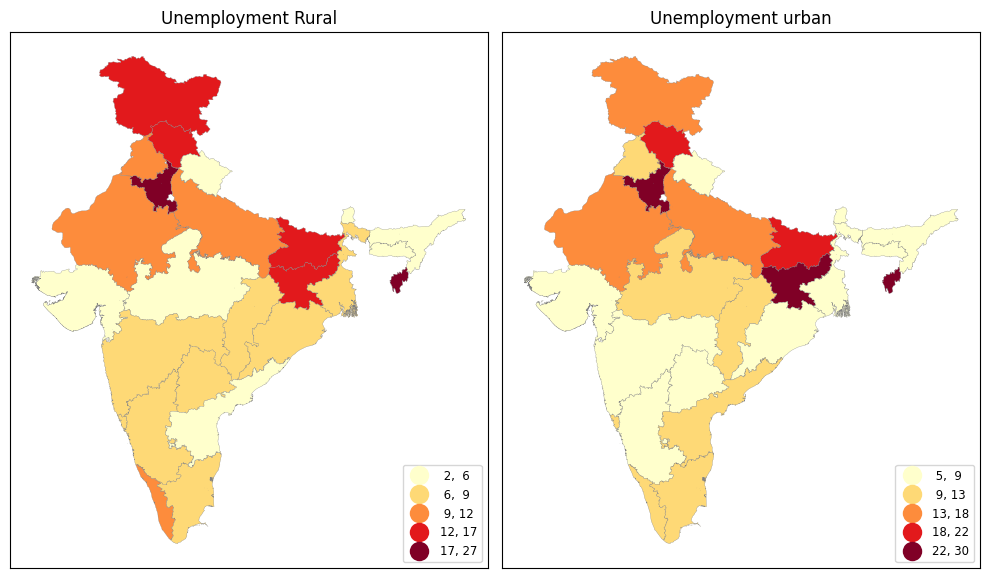

In [58]:
fig, axs = plt.subplots(1,2, figsize=(10,10),sharey=True, tight_layout=True)
Rural_df_1.plot(ax=axs[0],column=' Estimated Unemployment Rate (%)',legend=True,cmap='YlOrRd',scheme='natural_breaks',k=5,
         edgecolor='grey',linewidth=0.2,legend_kwds= {"fmt": "{:,.0f}",
        'loc':'lower right','title_fontsize':'medium','fontsize':'small','markerscale':1.4}) #
axs[0].title.set_text("Unemployment Rural")
axs[0].set_xticks([]); axs[0].set_yticks([])

Urban_df_1.plot(ax=axs[1],column=' Estimated Unemployment Rate (%)',legend=True,cmap='YlOrRd',scheme='natural_breaks',k=5,
         edgecolor='grey',linewidth=0.2,legend_kwds= {"fmt": "{:,.0f}",
        'loc':'lower right','title_fontsize':'medium','fontsize':'small','markerscale':1.4}) #
axs[1].title.set_text("Unemployment urban")
axs[1].set_xticks([]); axs[1].set_yticks([])

By the Map we could infer unemployment is higher in urban compared to rural areas

### MAP 4

In [59]:
Literacy_df.dtypes

State               object
Literacy_rate      float64
geometry          geometry
_merge            category
Literacy Rural     float64
Literacy Urban     float64
dtype: object

<Axes: >

[]

[]

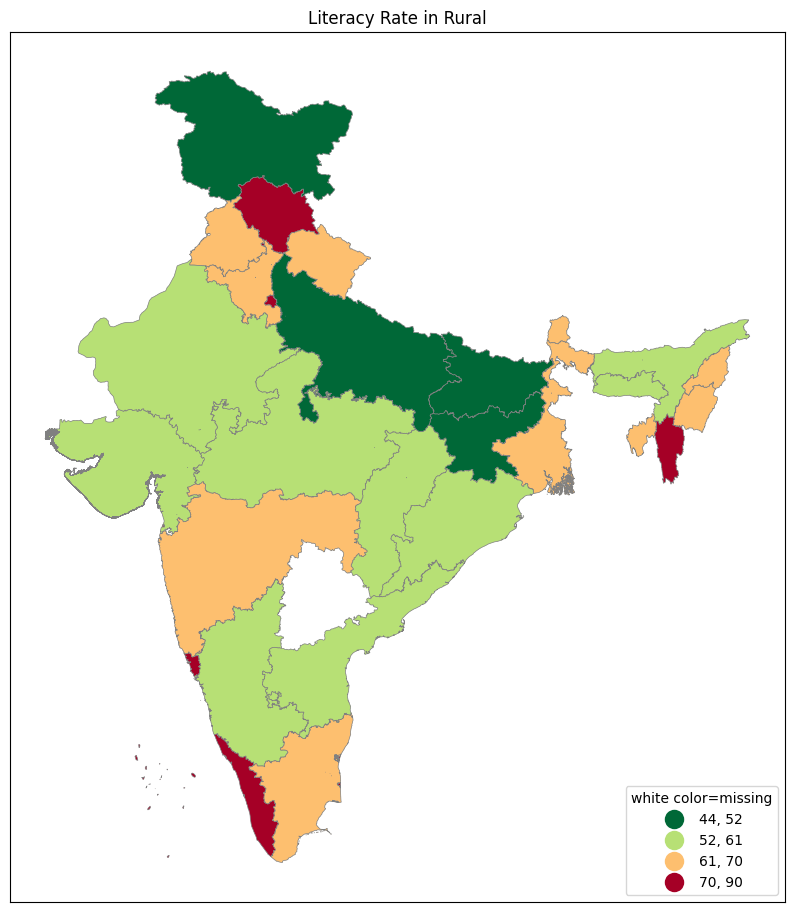

In [60]:
fig, ax = plt.subplots(1, figsize=(10,12))
Literacy_df.plot(ax=ax,column='Literacy Rural',legend=True,cmap='RdYlGn_r',
          scheme='natural_breaks',k=4, edgecolor='grey',linewidth=0.5,
          legend_kwds= {"fmt": "{:,.0f}",'loc':'lower right','markerscale':1.4})
leg1 = ax.get_legend()
leg1.set_title('''white color=missing''')
ax.title.set_text("Literacy Rate in Rural")
ax.set_xticks([]) #kills xticks
ax.set_yticks([]) #kills xticks

<Axes: >

[]

[]

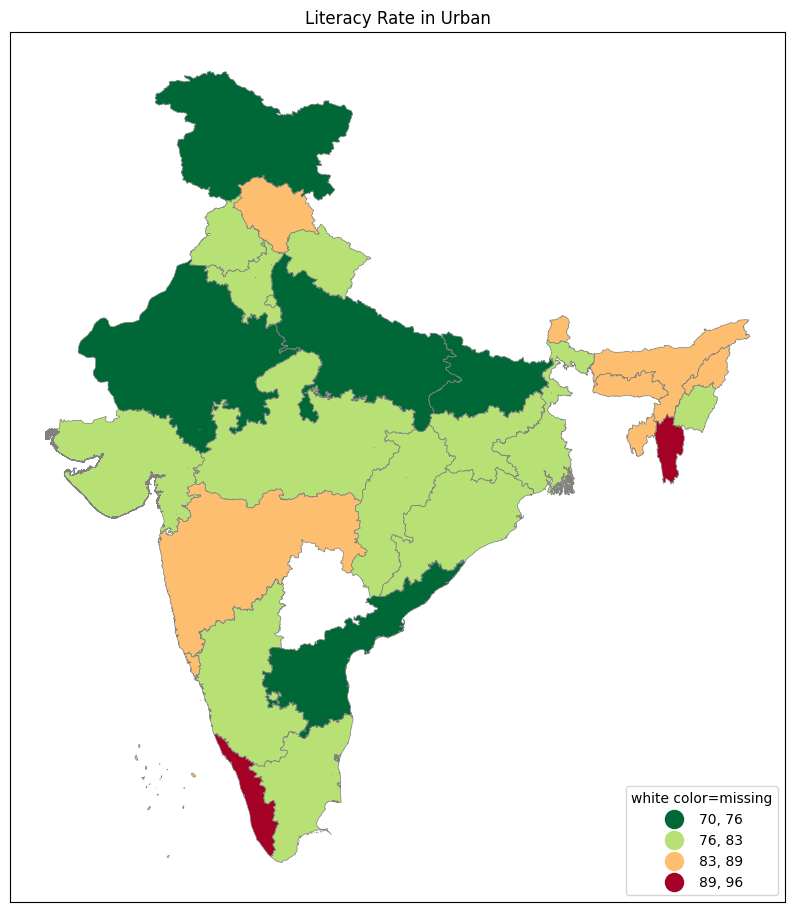

In [61]:
fig, ax = plt.subplots(1, figsize=(10,12))
Literacy_df.plot(ax=ax,column='Literacy Urban',legend=True,cmap='RdYlGn_r',
          scheme='natural_breaks',k=4, edgecolor='grey',linewidth=0.5,
          legend_kwds= {"fmt": "{:,.0f}",'loc':'lower right','markerscale':1.4})
leg1 = ax.get_legend()
leg1.set_title('''white color=missing''')
ax.title.set_text("Literacy Rate in Urban")
ax.set_xticks([]) #kills xticks
ax.set_yticks([]) #kills xticks

<Axes: >

[]

[]

<Axes: >

[]

[]

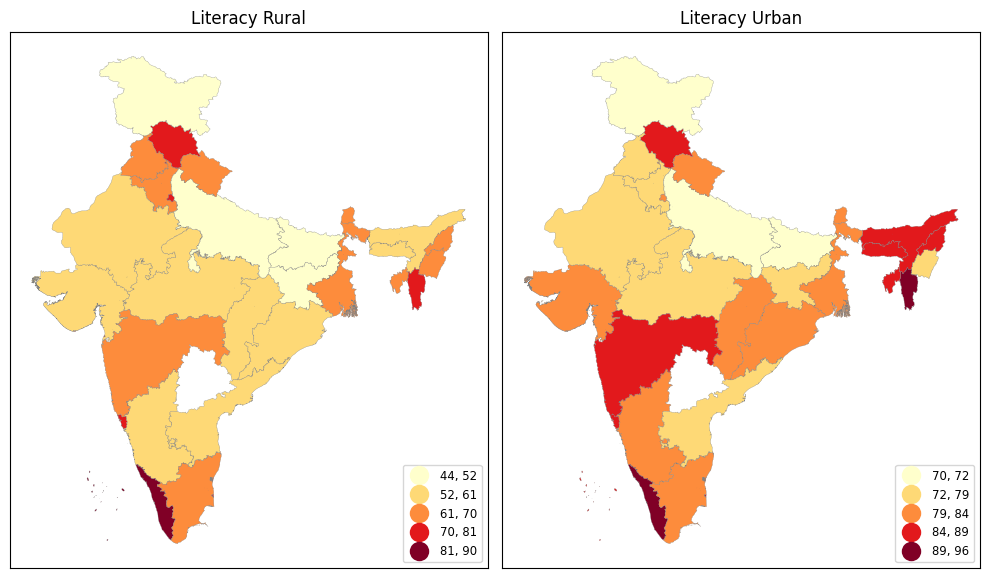

In [62]:
fig, axs = plt.subplots(1,2, figsize=(10,10),sharey=True, tight_layout=True)
Literacy_df.plot(ax=axs[0],column='Literacy Rural',legend=True,cmap='YlOrRd',scheme='natural_breaks',k=5,
         edgecolor='grey',linewidth=0.2,legend_kwds= {"fmt": "{:,.0f}",
        'loc':'lower right','title_fontsize':'medium','fontsize':'small','markerscale':1.4}) #
axs[0].title.set_text("Literacy Rural")
axs[0].set_xticks([]); axs[0].set_yticks([])

Literacy_df.plot(ax=axs[1],column='Literacy Urban',legend=True,cmap='YlOrRd',scheme='natural_breaks',k=5,
         edgecolor='grey',linewidth=0.2,legend_kwds= {"fmt": "{:,.0f}",
        'loc':'lower right','title_fontsize':'medium','fontsize':'small','markerscale':1.4}) #
axs[1].title.set_text("Literacy Urban")
axs[1].set_xticks([]); axs[1].set_yticks([])

By the map we can infer literacy rate is higher in urban compared to rural areas

###JOIN 3

In [63]:
! wget -q -O income_df.csv "https://drive.google.com/uc?id=106qcBt1kvyzv7zbNLWdxhd0eeTHI1Iy-"

In [64]:
df_income_pov = pd.read_csv("income_df.csv")

In [65]:
df_income_pov.head()

,State,2000-01-INC,2019 INC,2001 - LIT,2019 - LIT,2001 - POP,2019 - POV,2001 -SEX_Ratio,2019 -SEX_Ratio,2001 -UNEMP,2019 -UNEMP,2001 -Poverty,2019 -Poverty
0,Andaman and Nicobar Islands,25047,89642,81.30,86.63,356,381,846,876,34,54,20.99,1.00
1,Andhra Pradesh,17195,64773,60.47,67.02,76210,84581,978,993,8,12,15.77,9.20
2,Arunachal Pradesh,15260,71366,54.34,65.39,1098,1384,893,938,5,17,33.47,34.67
3,Assam,12803,36320,63.25,72.19,26656,31206,935,958,39,45,36.09,31.98
4,Bihar,6415,22582,47.00,61.80,82999,104099,919,918,18,32,42.60,33.74


Rename Jammu and kashmir to Jammu & Kashmir

In [66]:
import pandas as pd
df_income_pov = df_income_pov.drop(df_income_pov[df_income_pov['State'] == 'Jammu & Kashmir'].index)

# Reset the index after dropping rows
df_income_pov.reset_index(drop=True, inplace=True)

# Display the DataFrame after dropping rows
print(df_income_pov)


                          State  2000-01-INC  2019 INC  2001 - LIT  \
0   Andaman and Nicobar Islands        25047     89642       81.30   
1                Andhra Pradesh        17195     64773       60.47   
2             Arunachal Pradesh        15260     71366       54.34   
3                         Assam        12803     36320       63.25   
4                         Bihar         6415     22582       47.00   
5                    Chandigarh        49771    136883       81.94   
6                  Chhattisgarh        10744     48366       64.66   
7                         Delhi        40678    161446       57.63   
8                           Goa        43735    211570       78.18   
9                       Gujarat        18392     85979       81.67   
10                      Haryana        25583    106320       82.01   
11             Himachal Pradesh        22795     75185       69.14   
12            Jammu and Kashmir        14268     46734       67.91   
13                  

In [67]:
df_income_pov['State'] = df_income_pov['State'].replace('Jammu and Kashmir', 'Jammu & Kashmir')

print(df_income_pov)


                          State  2000-01-INC  2019 INC  2001 - LIT  \
0   Andaman and Nicobar Islands        25047     89642       81.30   
1                Andhra Pradesh        17195     64773       60.47   
2             Arunachal Pradesh        15260     71366       54.34   
3                         Assam        12803     36320       63.25   
4                         Bihar         6415     22582       47.00   
5                    Chandigarh        49771    136883       81.94   
6                  Chhattisgarh        10744     48366       64.66   
7                         Delhi        40678    161446       57.63   
8                           Goa        43735    211570       78.18   
9                       Gujarat        18392     85979       81.67   
10                      Haryana        25583    106320       82.01   
11             Himachal Pradesh        22795     75185       69.14   
12              Jammu & Kashmir        14268     46734       67.91   
13                  

In [68]:
df_inc = pd.merge(Ind, df_income_pov, on='State',how='outer',indicator=True)

In [69]:
df_Inc_2 = pd.merge(Ind, df_income_pov, on='State',how='inner',indicator=False)

In [70]:
df_inc.dtypes

State                object
geometry           geometry
2000-01-INC         float64
2019 INC            float64
2001 - LIT          float64
2019 - LIT          float64
2001 - POP          float64
2019 - POV          float64
2001 -SEX_Ratio     float64
2019 -SEX_Ratio     float64
2001 -UNEMP         float64
2019 -UNEMP         float64
2001 -Poverty       float64
2019 -Poverty       float64
_merge             category
dtype: object

In [71]:
df_inc = df_inc[['State','2019 - LIT','2019 -Poverty','_merge','geometry','2019 INC','2019 - POV']]

In [72]:
df_inc.dtypes

State              object
2019 - LIT        float64
2019 -Poverty     float64
_merge           category
geometry         geometry
2019 INC          float64
2019 - POV        float64
dtype: object

In [73]:
import pandas as pd

print(df_inc['State'])


0        Andaman & Nicobar Island
1              Arunanchal Pradesh
2                           Assam
3                           Bihar
4                      Chandigarh
5                    Chhattisgarh
6          Dadara & Nagar Havelli
7                     Daman & Diu
8                             Goa
9                         Gujarat
10                        Haryana
11               Himachal Pradesh
12                Jammu & Kashmir
13                      Jharkhand
14                      Karnataka
15                         Kerala
16                    Lakshadweep
17                 Madhya Pradesh
18                    Maharashtra
19                        Manipur
20                      Meghalaya
21                        Mizoram
22                       Nagaland
23                   NCT of Delhi
24                     Puducherry
25                         Punjab
26                      Rajasthan
27                         Sikkim
28                     Tamil Nadu
29            

<Axes: >

[]

[]

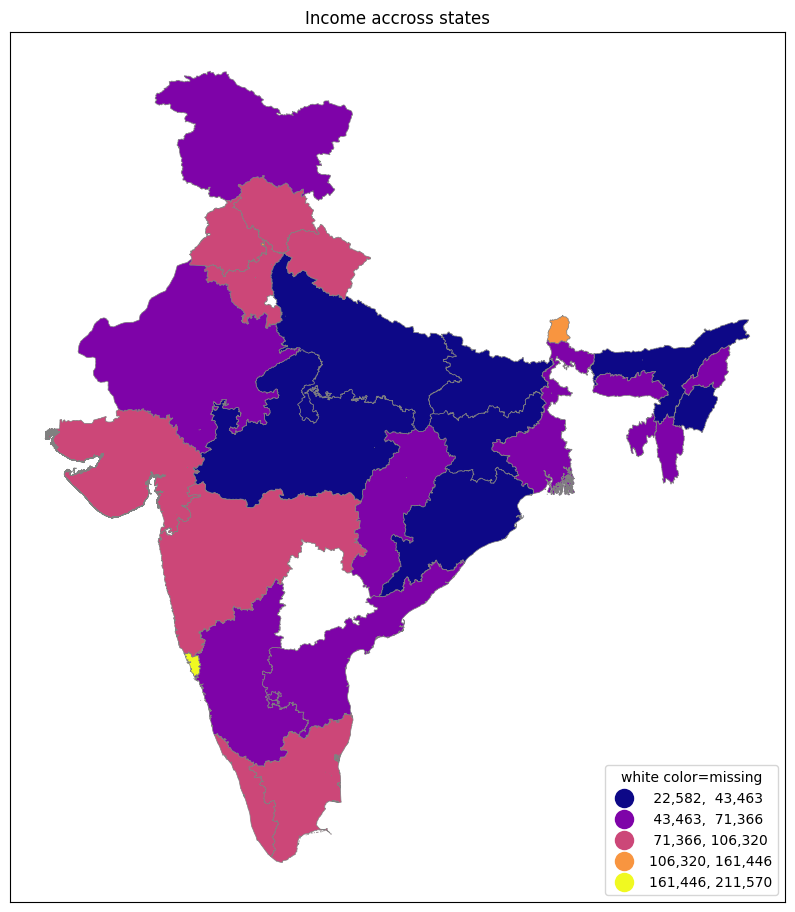

In [74]:
fig, ax = plt.subplots(1, figsize=(10,12))
df_inc.plot(ax=ax,column='2019 INC',legend=True,cmap='plasma',
          scheme='natural_breaks',k=5, edgecolor='grey',linewidth=0.5,
          legend_kwds= {"fmt": "{:,.0f}",'loc':'lower right','markerscale':1.4})
leg1 = ax.get_legend()
leg1.set_title('''white color=missing''')
ax.title.set_text("Income accross states")
ax.set_xticks([]) #kills xticks
ax.set_yticks([]) #kills xticks

### Centroid - analysing two specific states
1) Lowest literacy and highest unemployment


In [75]:
#1
Lit_df_2 = Literacy_df.copy()
Lit_df_2["geometry"] = Lit_df_2["geometry"].centroid

<ipython-input-75-3b9ff8855cb1>:3: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  Lit_df_2["geometry"] = Lit_df_2["geometry"].centroid


In [76]:
State_1=Ind.query("State=='Jharkhand'")

<Axes: >

[]

[]

<Axes: >

<Axes: title={'center': 'Literacy rate'}>

'\n/   - diagonal hatching\n\\   - back diagonal\n|   - vertical\n-   - horizontal\n+   - crossed\nx   - crossed diagonal\no   - small circle\nO   - large circle\n.   - dots\n*   - stars\n'

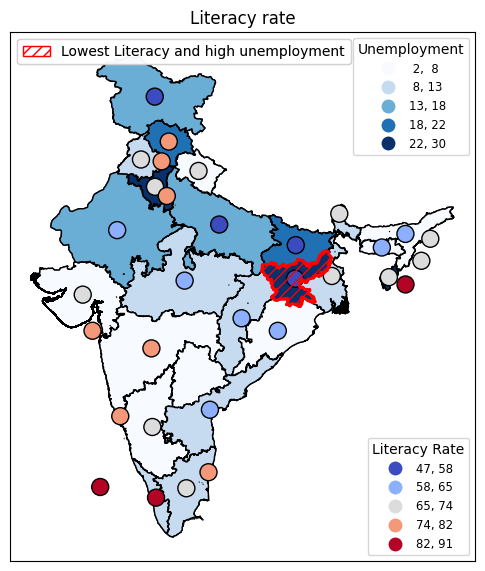

In [77]:
fig, ax = plt.subplots(1, figsize=(6,14))
df_1.plot(ax=ax,column=' Estimated Unemployment Rate (%)',legend=True,cmap='Blues',scheme='natural_breaks',k=5,
         edgecolor='black',linewidth=1,legend_kwds= {"fmt": "{:,.0f}",
        'loc':'upper right','title_fontsize':'medium','fontsize':'small','markerscale':1})

l1 = ax.get_legend()
l1.set_title('''Unemployment''')
ax.set_xticks([]); ax.set_yticks([])

ax.add_artist(l1)
Lit_df_2.plot(ax=ax,column='Literacy_rate',legend=True,cmap='coolwarm',scheme='natural_breaks',k=5,
         edgecolor='black',linewidth=1,legend_kwds= {"fmt": "{:,.0f}",
        'loc':'lower right','title_fontsize':'medium','fontsize':'small','markerscale':1},
         markersize = 150)


ax.title.set_text("Literacy rate")
l2 = ax.get_legend()
l2.set_title('''Literacy rate''')

State_1.plot(ax=ax,edgecolor='red',linewidth=2, facecolor="none",alpha=1,hatch='///')
'''
/   - diagonal hatching
\   - back diagonal
|   - vertical
-   - horizontal
+   - crossed
x   - crossed diagonal
o   - small circle
O   - large circle
.   - dots
*   - stars
'''

l1 = ax.get_legend()
l1.set_title('''Literacy Rate''')

import matplotlib.patches as mpatches

bluePatch = mpatches.Patch(edgecolor='red', facecolor='none',
                     hatch='///', label=r'Lowest Literacy and high unemployment')
l2=plt.legend(handles=[bluePatch],loc='upper left')


ax.add_artist(l2)
ax.add_artist(l1)

#2 Low literacy and low income

In [78]:
import pandas as pd

min_value = Literacy_df['Literacy_rate'].min()

print("The minimum value in the column 'lit_rate' is:", min_value)


The minimum value in the column 'lit_rate' is: 47.0


In [79]:
import pandas as pd

# Assuming you have a DataFrame called Literacy_df
# Replace 'Literacy_df' with the actual DataFrame name

# Filter rows where 'Literacy_rate' is 47.0
filtered_rows = Literacy_df[Literacy_df['Literacy_rate'] == 47.0]

# Extract the 'State' column from the filtered rows
states_with_47_literacy_rate = filtered_rows['State']

# Display the 'State' values where 'Literacy_rate' is 47.0
print(states_with_47_literacy_rate)


3    Bihar
Name: State, dtype: object


In [80]:
State_2=Ind.query("State=='Bihar'")

<Axes: >

[]

[]

<Axes: >

<Axes: title={'center': 'Literacy rate'}>

'\n/   - diagonal hatching\n\\   - back diagonal\n|   - vertical\n-   - horizontal\n+   - crossed\nx   - crossed diagonal\no   - small circle\nO   - large circle\n.   - dots\n*   - stars\n'

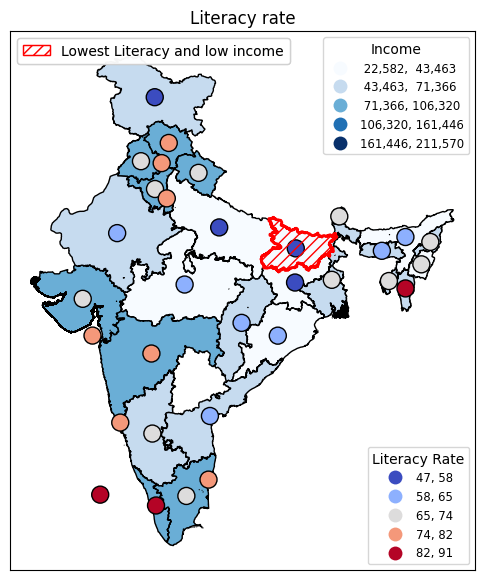

In [81]:
fig, ax = plt.subplots(1, figsize=(6,14))
df_inc.plot(ax=ax,column='2019 INC',legend=True,cmap='Blues',scheme='natural_breaks',k=5,
         edgecolor='black',linewidth=1,legend_kwds= {"fmt": "{:,.0f}",
        'loc':'upper right','title_fontsize':'medium','fontsize':'small','markerscale':1})

l1 = ax.get_legend()
l1.set_title('''Income''')
ax.set_xticks([]); ax.set_yticks([])

ax.add_artist(l1)
Lit_df_2.plot(ax=ax,column='Literacy_rate',legend=True,cmap='coolwarm',scheme='natural_breaks',k=5,
         edgecolor='black',linewidth=1,legend_kwds= {"fmt": "{:,.0f}",
        'loc':'lower right','title_fontsize':'medium','fontsize':'small','markerscale':1},
         markersize = 150)


ax.title.set_text("Literacy rate")
l2 = ax.get_legend()
l2.set_title('''Literacy rate''')

State_2.plot(ax=ax,edgecolor='red',linewidth=2, facecolor="none",alpha=1,hatch='///')
'''
/   - diagonal hatching
\   - back diagonal
|   - vertical
-   - horizontal
+   - crossed
x   - crossed diagonal
o   - small circle
O   - large circle
.   - dots
*   - stars
'''

l1 = ax.get_legend()
l1.set_title('''Literacy Rate''')

import matplotlib.patches as mpatches

bluePatch = mpatches.Patch(edgecolor='red', facecolor='none',
                     hatch='///', label=r'Lowest Literacy and low income')
l2=plt.legend(handles=[bluePatch],loc='upper left')


ax.add_artist(l2)
ax.add_artist(l1)

###Other Visualisations###

In [82]:
#let us start with some basic imports

# for data Analysis

import numpy as np
import pandas as pd

# for data visualization

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
# k-means for cluster
from sklearn.cluster import KMeans

%matplotlib inline


### Line plot between income and literacy rate ###

In [83]:
import plotly.graph_objects as go
import pandas as pd

# Normalize the data
df_inc['2019 INC'] = (df_inc['2019 INC'] - df_inc['2019 INC'].min()) / (df_inc['2019 INC'].max() - df_inc['2019 INC'].min())
df_inc['2019 - LIT'] = (df_inc['2019 - LIT'] - df_inc['2019 - LIT'].min()) / (df_inc['2019 - LIT'].max() - df_inc['2019 - LIT'].min())

# Plotting the line chart
fig = go.Figure()

# Add lines for income and literacy rate
fig.add_trace(go.Scatter(x=df_inc['State'], y=df_inc['2019 INC'], mode='lines', name='Income', line=dict(color='#53D1BA')))
fig.add_trace(go.Scatter(x=df_inc['State'], y=df_inc['2019 - LIT'], mode='lines', name='Literacy Rate', line=dict(color='#D11E5D')))

# Update layout
fig.update_layout(
    title='India State Income vs Literacy rate in 2019',
    xaxis=dict(title='States in India'),
    yaxis=dict(title='Normalized Value'),
    yaxis2=dict(title='Normalized Literacy Rate', overlaying='y', side='right'),
    legend=dict(x=0.1, y=1.15, orientation='h'),
    template='plotly_dark'
)

fig.show()


### Pie Chart for unemployment accross states

In [84]:
df_1.dtypes

State                                 object
 Estimated Unemployment Rate (%)     float64
Area                                  object
_merge                              category
geometry                            geometry
dtype: object

In [85]:
import plotly.express as px
import pandas as pd
fig = px.pie(
    df_1,
    names='State',  # Categories (states) for the pie chart
    values=' Estimated Unemployment Rate (%)',  # Values based on estimated unemployment rates
    title='Unemployment Rate Distribution by State',
    hover_data=[' Estimated Unemployment Rate (%)'],  # Data to display on hover
)

fig.show()

BASEMAP

In [86]:
! pip install contextily
import contextily as cx

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.6/20.6 MB 67.8 MB/s eta 0:00:00


In [87]:
Ind = Ind.to_crs(epsg=3857)

#PS3
I have focused my ps3 in two parts
1) to plot top universities accross india
2) Literacy rate accross cities


###Geocoding


In [88]:
import time, webbrowser, zipfile

import pandas as pd
import geopandas as gpd

from google.colab import data_table
data_table.enable_dataframe_formatter()

from geopandas.tools import geocode
#! pip install geocoder
from geopy.geocoders import Nominatim
#if you do a lot of geocoding:
#https://developers.google.com/maps/documentation/geocoding/overview

geolocator = Nominatim(user_agent='blah@gmail.com')

from google.colab import files

import folium as f
from folium.plugins import MarkerCluster, HeatMap

#will display all output not just last command
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [89]:
!pip install mapclassify
import mapclassify

In [90]:
! wget -q -O rest_df.csv https://drive.google.com/uc?id=1qx_rE7iVoPDwafFRcsR4vLbsk4Xve1Mw&export=download

In [91]:
df_uni = pd.read_csv("rest_df.csv")

In [92]:
df_uni.head()

,College_Name,State,Stream,UG_fee,PG_fee,Rating,Academic,Accommodation,Faculty,Infrastructure,Placement,Social_Life
0,Indian Institute of Technology Madras,Tamil nadu,Engineering,"75,116","23,070",8.7,9,7.9,8.7,8.8,8.8,9
1,"College of Engineering, Anna University",Tamil nadu,Engineering,"50,000","50,000",8.4,8.7,7.7,8.1,8.7,8.3,8.7
2,"NIT Trichy, Tiruchirappalli",Tamil nadu,Engineering,"1,49,250","99,250",8.5,8.6,7.8,8.2,8.7,8.8,8.7
3,Vellore Institute of Technology,Tamil nadu,Engineering,"1,98,000","1,83,000",8.3,8.3,8,7.8,8.9,8.5,8.5
4,"SRM Engineering College, Kanchipuram",Tamil nadu,Engineering,"2,60,000","1,70,000",7.2,6.5,6.6,6.9,7.6,7.1,8.3


Data Cleaning

In [93]:
df_uni.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6788 entries, 0 to 6787
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   College_Name    6788 non-null   object
 1   State           6788 non-null   object
 2   Stream          6788 non-null   object
 3   UG_fee          6788 non-null   object
 4   PG_fee          6788 non-null   object
 5   Rating          6788 non-null   object
 6   Academic        6788 non-null   object
 7   Accommodation   6788 non-null   object
 8   Faculty         6788 non-null   object
 9   Infrastructure  6788 non-null   object
 10  Placement       6788 non-null   object
 11  Social_Life     6788 non-null   object
dtypes: object(12)
memory usage: 636.5+ KB


In [94]:
null_values = df_uni.isnull().sum()

# Display the count of null values for each column
print("Null values in each column:")
print(null_values)

Null values in each column:
College_Name      0
State             0
Stream            0
UG_fee            0
PG_fee            0
Rating            0
Academic          0
Accommodation     0
Faculty           0
Infrastructure    0
Placement         0
Social_Life       0
dtype: int64


In [95]:
import pandas as pd

# Merge 'Name' and 'LastName' columns into a new 'FullName' column
df_uni['Col_st'] = df_uni['College_Name'] + ' ' + df_uni['State']

# Display the updated DataFrame
print(df_uni)


                                           College_Name       State  \
0                Indian Institute of Technology Madras   Tamil nadu   
1              College of Engineering, Anna University   Tamil nadu   
2                          NIT Trichy, Tiruchirappalli   Tamil nadu   
3                      Vellore Institute of Technology   Tamil nadu   
4                 SRM Engineering College, Kanchipuram   Tamil nadu   
...                                                 ...         ...   
6783  Andaman & Nicobar Islands Institute of Medical...     Andaman   
6784  Plastindia International University, Dadra & N...       Dadra   
6785          SSR Institute of Management and Research        Dadra   
6786  Institute of Hotel Management and Catering Tec...       Dadra   
6787                     Government Polytechnic, Daman        Daman   

                Stream    UG_fee    PG_fee Rating Academic Accommodation  \
0          Engineering    75,116    23,070    8.7        9           7.

In [96]:
df_uni.head()

,College_Name,State,Stream,UG_fee,PG_fee,Rating,Academic,Accommodation,Faculty,Infrastructure,Placement,Social_Life,Col_st
0,Indian Institute of Technology Madras,Tamil nadu,Engineering,"75,116","23,070",8.7,9,7.9,8.7,8.8,8.8,9,Indian Institute of Technology Madras Tamil nadu
1,"College of Engineering, Anna University",Tamil nadu,Engineering,"50,000","50,000",8.4,8.7,7.7,8.1,8.7,8.3,8.7,"College of Engineering, Anna University Tamil..."
2,"NIT Trichy, Tiruchirappalli",Tamil nadu,Engineering,"1,49,250","99,250",8.5,8.6,7.8,8.2,8.7,8.8,8.7,"NIT Trichy, Tiruchirappalli Tamil nadu"
3,Vellore Institute of Technology,Tamil nadu,Engineering,"1,98,000","1,83,000",8.3,8.3,8,7.8,8.9,8.5,8.5,Vellore Institute of Technology Tamil nadu
4,"SRM Engineering College, Kanchipuram",Tamil nadu,Engineering,"2,60,000","1,70,000",7.2,6.5,6.6,6.9,7.6,7.1,8.3,"SRM Engineering College, Kanchipuram Tamil nadu"


In [97]:
# Assuming df is your DataFrame and 'Column1' is the column of interest
duplicates_column1 = df_uni[df_uni['College_Name'].duplicated()]

# Display the rows that have duplicate values in 'Column1'
print("Duplicate Rows1:")
print(duplicates_column1)


Duplicate Rows1:
                                           College_Name          State  \
59                      Indian Institute of Technology   Uttar pradesh   
64          Indian Institute of Information Technology   Uttar pradesh   
76          Indian Institute of Information Technology   Uttar pradesh   
86                      Indian Institute of Technology       Delhi ncr   
89                             Amity University, Noida       Delhi ncr   
...                                                 ...            ...   
6779     Mahatma Gandhi Government College, Mayabander         Andaman   
6780  Tagore Government College of Education, Port B...        Andaman   
6781  Dr. B R Ambedkar Institute of Technology, Port...        Andaman   
6782           Jawaharlal Nehru Rajkeeya Mahavidyalaya         Andaman   
6786  Institute of Hotel Management and Catering Tec...          Dadra   

                Stream    UG_fee    PG_fee Rating Academic Accommodation  \
59         Enginee

In [98]:
# Assuming df is your DataFrame and 'Column1' is the column of interest
df_uni.drop_duplicates(subset=['College_Name'], inplace=True)

# Now df has duplicates removed based on 'Column1'
print("DataFrame without Duplicates based on Column1:")
print(df_uni)


DataFrame without Duplicates based on Column1:
                                           College_Name       State  \
0                Indian Institute of Technology Madras   Tamil nadu   
1              College of Engineering, Anna University   Tamil nadu   
2                          NIT Trichy, Tiruchirappalli   Tamil nadu   
3                      Vellore Institute of Technology   Tamil nadu   
4                 SRM Engineering College, Kanchipuram   Tamil nadu   
...                                                 ...         ...   
6775  Tagore Government College of Education, Port B...     Andaman   
6783  Andaman & Nicobar Islands Institute of Medical...     Andaman   
6784  Plastindia International University, Dadra & N...       Dadra   
6785          SSR Institute of Management and Research        Dadra   
6787                     Government Polytechnic, Daman        Daman   

           Stream    UG_fee    PG_fee Rating Academic Accommodation Faculty  \
0     Engineering    

In [99]:
c = df_uni['College_Name'].duplicated().sum()
c

0

In [100]:
df_uni.dtypes

College_Name      object
State             object
Stream            object
UG_fee            object
PG_fee            object
Rating            object
Academic          object
Accommodation     object
Faculty           object
Infrastructure    object
Placement         object
Social_Life       object
Col_st            object
dtype: object

In [101]:

# Specify the column names you want to convert
columns_to_convert = ['Rating', 'Academic', 'Accommodation','Faculty','Infrastructure','Placement','Social_Life']  # Replace with your actual column names

# Convert specified columns to float using apply
df_uni[columns_to_convert] = df_uni[columns_to_convert].apply(pd.to_numeric, errors='coerce')

# Display the updated DataFrame
print(df_uni)


                                           College_Name       State  \
0                Indian Institute of Technology Madras   Tamil nadu   
1              College of Engineering, Anna University   Tamil nadu   
2                          NIT Trichy, Tiruchirappalli   Tamil nadu   
3                      Vellore Institute of Technology   Tamil nadu   
4                 SRM Engineering College, Kanchipuram   Tamil nadu   
...                                                 ...         ...   
6775  Tagore Government College of Education, Port B...     Andaman   
6783  Andaman & Nicobar Islands Institute of Medical...     Andaman   
6784  Plastindia International University, Dadra & N...       Dadra   
6785          SSR Institute of Management and Research        Dadra   
6787                     Government Polytechnic, Daman        Daman   

           Stream    UG_fee    PG_fee  Rating  Academic  Accommodation  \
0     Engineering    75,116    23,070     8.7       9.0            7.9   

In [102]:
df_uni.dtypes

College_Name       object
State              object
Stream             object
UG_fee             object
PG_fee             object
Rating            float64
Academic          float64
Accommodation     float64
Faculty           float64
Infrastructure    float64
Placement         float64
Social_Life       float64
Col_st             object
dtype: object

Mapping top university in india

In [103]:
location = geolocator.geocode("Indian Institute of Technology Madras Tamil nadu")
location.address

'Indian Institute of Technology Madras, ThiruVedi Amman Koil Street, Sony Nagar, Ward 179, Zone 13 Adyar, Chennai District, Tamil Nadu, 600036, India'

In [104]:
(location.latitude, location.longitude)

(12.99415605, 80.2366825512945)

In [105]:
from geopy.geocoders import Nominatim
import folium

geolocator = Nominatim(user_agent="my_geocoder")

location = geolocator.geocode("Indian Institute of Technology Madras Tamil Nadu")

if location:
    # Create a folium map centered at the location
    map_center = [12.99415605, 80.2366825512945]
    my_map = folium.Map(location=map_center, zoom_start=15)

    # Add a marker for the location
    folium.Marker(
        location=map_center,
        popup=location.address,
        icon=folium.Icon(color='blue')
    ).add_to(my_map)

    # Save the map as an HTML file or display it
    my_map.save("my_map.html")
    # my_map
else:
    print("Location not found.")


In [106]:
my_map

In [107]:
df_uni.head()

,College_Name,State,Stream,UG_fee,PG_fee,Rating,Academic,Accommodation,Faculty,Infrastructure,Placement,Social_Life,Col_st
0,Indian Institute of Technology Madras,Tamil nadu,Engineering,"75,116","23,070",8.7,9.0,7.9,8.7,8.8,8.8,9.0,Indian Institute of Technology Madras Tamil nadu
1,"College of Engineering, Anna University",Tamil nadu,Engineering,"50,000","50,000",8.4,8.7,7.7,8.1,8.7,8.3,8.7,"College of Engineering, Anna University Tamil..."
2,"NIT Trichy, Tiruchirappalli",Tamil nadu,Engineering,"1,49,250","99,250",8.5,8.6,7.8,8.2,8.7,8.8,8.7,"NIT Trichy, Tiruchirappalli Tamil nadu"
3,Vellore Institute of Technology,Tamil nadu,Engineering,"1,98,000","1,83,000",8.3,8.3,8.0,7.8,8.9,8.5,8.5,Vellore Institute of Technology Tamil nadu
4,"SRM Engineering College, Kanchipuram",Tamil nadu,Engineering,"2,60,000","1,70,000",7.2,6.5,6.6,6.9,7.6,7.1,8.3,"SRM Engineering College, Kanchipuram Tamil nadu"


Plotting all top universities in India

In [108]:

column_name = 'Rating'  # Replace 'ColumnName' with the actual column name

# Filter rows where the value in the specified column is above 8
filtered_df = df_uni[df_uni[column_name] > 9.0]

# Display the filtered DataFrame
print(filtered_df)


                                           College_Name             State  \
221                        Avantika University, Ujjain     Madhya pradesh   
330                      P.P. Savani University, Surat            Gujarat   
439       Department of Management Studies, IIT Madras         Tamil nadu   
444   Department of Management Studies, Anna Univers...        Tamil nadu   
462               DJ Academy for Managerial Excellence         Tamil nadu   
...                                                 ...               ...   
6026  Faculty of Legal Sciences, Shoolini University...  Himachal pradesh   
6044  University Institute of Legal Studies, Chandig...        Chandigarh   
6051  National Centre for Antarctic and Ocean Research                Goa   
6105  Shree Maliikarjun College of Arts and Commerce...               Goa   
6528      Achariya School Tourism and Hotel Management         Puducherry   

                Stream    UG_fee     PG_fee  Rating  Academic  Accommodatio

In [109]:
import folium
from geopy.geocoders import Nominatim
import time

geolocator = Nominatim(user_agent="my_geocoder")

india_center_location = geolocator.geocode("India")


m = folium.Map(location=[india_center_location.latitude, india_center_location.longitude], zoom_start=4)


for i in filtered_df.index:
    time.sleep(1)  # To avoid hitting the geocoding service too quickly
    location = geolocator.geocode(filtered_df['Col_st'][i])
    if location:
        folium.Marker(location=[location.latitude, location.longitude], popup='UNI ').add_to(m)

# Save the map as an HTML file or display it
m.save("universities_map.html")
# m


In [110]:
m

Most of the universities with rating above 9 are in southern part of India.

State with most uni and plot

In [111]:
state_counts = df_uni['State'].value_counts()

# Display the result
print("Number of universities in each state:")
print(state_counts)

Number of universities in each state:
Kerala               198
Maharashtra          194
Karnataka            181
Andhra pradesh       180
Telangana            172
Tamil nadu           171
West bengal          160
Uttar pradesh        154
Gujarat              136
Orissa               134
Bihar                117
Delhi ncr            112
Uttarakhand          109
Assam                106
Madhya pradesh       105
Chhattisgarh          93
Haryana               90
Punjab                90
Himachal pradesh      80
Jharkhand             77
Rajasthan             76
Jammu                 75
Puducherry            53
Goa                   43
Chandigarh            41
Nagaland              35
Arunachal pradesh     28
Meghalaya             26
Tripura               22
Manipur               22
Sikkim                17
Mizoram               15
Andaman                5
Dadra                  2
Daman                  1
Name: State, dtype: int64


In [112]:

df_Maha = df_uni[df_uni['State'] == 'Maharashtra']

print(df_Maha)


                                           College_Name        State  \
28                                          IIT Bombay   Maharashtra   
29                    Institute of Chemical Technology   Maharashtra   
30       Visvesvaraya National Institute of Technology   Maharashtra   
31                              College of Engineering   Maharashtra   
32            Defence Institute of Advanced Technology   Maharashtra   
...                                                 ...          ...   
4173                      A.K.K. New Law Academy, Pune   Maharashtra   
4176  ASM's Institute of Business Management & Resea...  Maharashtra   
4178             Gopaldas Jhamatmal Advani Law College   Maharashtra   
4179                    PES's Modern Law College, Pune   Maharashtra   
4180                        Nari Gursahani Law College   Maharashtra   

           Stream    UG_fee  PG_fee  Rating  Academic  Accommodation  Faculty  \
28    Engineering  2,28,000  32,000     8.9       9.3 

In [113]:
df_Maha.head()

,College_Name,State,Stream,UG_fee,PG_fee,Rating,Academic,Accommodation,Faculty,Infrastructure,Placement,Social_Life,Col_st
28,IIT Bombay,Maharashtra,Engineering,"2,28,000","32,000",8.9,9.3,7.9,8.7,8.9,9.1,9.2,IIT Bombay Maharashtra
29,Institute of Chemical Technology,Maharashtra,Engineering,"85,350","70,750",8.7,9.1,8.1,8.9,8.7,8.4,9.1,Institute of Chemical Technology Maharashtra
30,Visvesvaraya National Institute of Technology,Maharashtra,Engineering,"1,49,200","93,600",8.1,8.3,7.5,8.0,8.4,7.7,8.7,Visvesvaraya National Institute of Technology ...
31,College of Engineering,Maharashtra,Engineering,"40,500","64,500",8.6,8.7,8.2,8.1,8.5,8.7,9.1,College of Engineering Maharashtra
32,Defence Institute of Advanced Technology,Maharashtra,Engineering,"1,53,600","45,000",8.8,9.0,8.6,8.8,9.0,8.6,8.6,Defence Institute of Advanced Technology Maha...


In [114]:
df_Maha.dtypes

College_Name       object
State              object
Stream             object
UG_fee             object
PG_fee             object
Rating            float64
Academic          float64
Accommodation     float64
Faculty           float64
Infrastructure    float64
Placement         float64
Social_Life       float64
Col_st             object
dtype: object

In [115]:
import pandas as pd
from geopy.geocoders import Nominatim
geolocator = Nominatim(user_agent="my_geocoder",timeout = 10)

# Function to geocode a location and return a tuple (latitude, longitude)
def geocode_location(location):
    try:
        location_data = geolocator.geocode(location)
        if location_data:
            return location_data.latitude, location_data.longitude
        else:
            return None, None
    except:
        return None, None

# Apply the geocode_location function to the 'Col_st' column and create new 'Latitude' and 'Longitude' columns
df_Maha[['Latitude', 'Longitude']] = df_Maha['Col_st'].apply(geocode_location).apply(pd.Series)

# Display the updated DataFrame
print(df_Maha)


                                           College_Name        State  \
28                                          IIT Bombay   Maharashtra   
29                    Institute of Chemical Technology   Maharashtra   
30       Visvesvaraya National Institute of Technology   Maharashtra   
31                              College of Engineering   Maharashtra   
32            Defence Institute of Advanced Technology   Maharashtra   
...                                                 ...          ...   
4173                      A.K.K. New Law Academy, Pune   Maharashtra   
4176  ASM's Institute of Business Management & Resea...  Maharashtra   
4178             Gopaldas Jhamatmal Advani Law College   Maharashtra   
4179                    PES's Modern Law College, Pune   Maharashtra   
4180                        Nari Gursahani Law College   Maharashtra   

           Stream    UG_fee  PG_fee  Rating  Academic  Accommodation  Faculty  \
28    Engineering  2,28,000  32,000     8.9       9.3 

<ipython-input-115-12d89e827321>:17: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-115-12d89e827321>:17: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [116]:
df_Maha.head()

,College_Name,State,Stream,UG_fee,PG_fee,Rating,Academic,Accommodation,Faculty,Infrastructure,Placement,Social_Life,Col_st,Latitude,Longitude
28,IIT Bombay,Maharashtra,Engineering,"2,28,000","32,000",8.9,9.3,7.9,8.7,8.9,9.1,9.2,IIT Bombay Maharashtra,19.132619,72.914979
29,Institute of Chemical Technology,Maharashtra,Engineering,"85,350","70,750",8.7,9.1,8.1,8.9,8.7,8.4,9.1,Institute of Chemical Technology Maharashtra,19.023913,72.858767
30,Visvesvaraya National Institute of Technology,Maharashtra,Engineering,"1,49,200","93,600",8.1,8.3,7.5,8.0,8.4,7.7,8.7,Visvesvaraya National Institute of Technology ...,21.126084,79.049752
31,College of Engineering,Maharashtra,Engineering,"40,500","64,500",8.6,8.7,8.2,8.1,8.5,8.7,9.1,College of Engineering Maharashtra,18.533884,73.880563
32,Defence Institute of Advanced Technology,Maharashtra,Engineering,"1,53,600","45,000",8.8,9.0,8.6,8.8,9.0,8.6,8.6,Defence Institute of Advanced Technology Maha...,18.424238,73.758703


In [117]:
df_Maha_cleaned = df_Maha.dropna(subset=['Latitude', 'Longitude'])

In [118]:
import folium
from folium.plugins import MarkerCluster

# Create a Folium map centered around a location
map_center = (19.75, 75.71)
m = folium.Map(location=map_center, zoom_start=6)

# Create a MarkerCluster and add it to the map
marker_cluster = MarkerCluster()

# Add locations to the MarkerCluster
for index, row in df_Maha_cleaned.iterrows():
    if not pd.isnull(row['Latitude']) and not pd.isnull(row['Longitude']):
        popup_text = f"{row['College_Name']} - {row['State']}"
        marker = folium.Marker(location=[row['Latitude'], row['Longitude']], popup=popup_text)
        marker.add_to(marker_cluster)

# Add the MarkerCluster to the map
m.add_child(marker_cluster)

# Save the map as an HTML file or display it
m.save("maha_map_cluster.html")
# m


In [119]:
import folium
from folium.plugins import HeatMap

# Create a Folium map centered around a location
map_center = (20.5936832,78.962883)
m = folium.Map(location=map_center, zoom_start=6)

# Create a list of coordinates from df_Maha_cleaned
heat_data = [[row['Latitude'], row['Longitude']] for index, row in df_Maha_cleaned.iterrows() if not pd.isnull(row['Latitude']) and not pd.isnull(row['Longitude'])]

# Add a HeatMap layer to the map
HeatMap(heat_data).add_to(m)

# Save the map as an HTML file or display it
m.save("maha_heatmap.html")
# m


In [120]:
m

Most of the universities are in mumbai

Literacy Rate

Aiming to plot literacy rate accross cities

In [121]:
! wget -q -O llit_df.csv https://drive.google.com/uc?id=1fDVkCwzchDOFKMjZ1tV0Ke5BljWpMCD3&export=download


In [122]:
df_LIT = pd.read_csv("llit_df.csv")

In [123]:
df_LIT.head(5)

,name_of_city,state_code,state_name,dist_code,population_total,population_male,population_female,0-6_population_total,0-6_population_male,0-6_population_female,...,literates_female,sex_ratio,child_sex_ratio,effective_literacy_rate_total,effective_literacy_rate_male,effective_literacy_rate_female,location,total_graduates,male_graduates,female_graduates
0,Abohar,3,PUNJAB,9,145238,76840,68398,15870,8587,7283,...,44972,890,848,79.86,85.49,73.59,"30.1452928,74.1993043",16287,8612,7675
1,Achalpur,27,MAHARASHTRA,7,112293,58256,54037,11810,6186,5624,...,43086,928,909,91.99,94.77,89.00,"21.257584,77.5086754",8863,5269,3594
2,Adilabad,28,ANDHRA PRADESH,1,117388,59232,58156,13103,6731,6372,...,37660,982,947,80.51,88.18,72.73,"19.0809075,79.560344",10565,6797,3768
3,Adityapur,20,JHARKHAND,24,173988,91495,82493,23042,12063,10979,...,54515,902,910,83.46,89.98,76.23,"22.7834741,86.1576889",19225,12189,7036
4,Adoni,28,ANDHRA PRADESH,21,166537,82743,83794,18406,9355,9051,...,45089,1013,968,68.38,76.58,60.33,"15.6322227,77.2728368",11902,7871,4031


In [124]:
df_LIT = df_LIT.drop(['sex_ratio', 'child_sex_ratio'], axis=1)

In [125]:
df_LIT['lattitude'] = df_LIT['location'].apply(lambda x: x.split(',')[0])
df_LIT['longitude'] = df_LIT['location'].apply(lambda x: x.split(',')[1])
df_LIT.head(5)

,name_of_city,state_code,state_name,dist_code,population_total,population_male,population_female,0-6_population_total,0-6_population_male,0-6_population_female,...,literates_female,effective_literacy_rate_total,effective_literacy_rate_male,effective_literacy_rate_female,location,total_graduates,male_graduates,female_graduates,lattitude,longitude
0,Abohar,3,PUNJAB,9,145238,76840,68398,15870,8587,7283,...,44972,79.86,85.49,73.59,"30.1452928,74.1993043",16287,8612,7675,30.1452928,74.1993043
1,Achalpur,27,MAHARASHTRA,7,112293,58256,54037,11810,6186,5624,...,43086,91.99,94.77,89.00,"21.257584,77.5086754",8863,5269,3594,21.257584,77.5086754
2,Adilabad,28,ANDHRA PRADESH,1,117388,59232,58156,13103,6731,6372,...,37660,80.51,88.18,72.73,"19.0809075,79.560344",10565,6797,3768,19.0809075,79.560344
3,Adityapur,20,JHARKHAND,24,173988,91495,82493,23042,12063,10979,...,54515,83.46,89.98,76.23,"22.7834741,86.1576889",19225,12189,7036,22.7834741,86.1576889
4,Adoni,28,ANDHRA PRADESH,21,166537,82743,83794,18406,9355,9051,...,45089,68.38,76.58,60.33,"15.6322227,77.2728368",11902,7871,4031,15.6322227,77.2728368


In [126]:
effective_literacy_rate_above_90 = df_LIT[((df_LIT.effective_literacy_rate_total > 90))]
effective_literacy_rate_above_90

,name_of_city,state_code,state_name,dist_code,population_total,population_male,population_female,0-6_population_total,0-6_population_male,0-6_population_female,...,literates_female,effective_literacy_rate_total,effective_literacy_rate_male,effective_literacy_rate_female,location,total_graduates,male_graduates,female_graduates,lattitude,longitude
1,Achalpur,27,MAHARASHTRA,7,112293,58256,54037,11810,6186,5624,...,43086,91.99,94.77,89.00,"21.257584,77.5086754",8863,5269,3594,21.257584,77.5086754
5,Agartala,16,TRIPURA,1,399688,199616,200072,33635,17341,16294,...,169109,93.88,95.75,92.02,"23.831457,91.2867777",52711,30215,22496,23.831457,91.2867777
8,Ahmadnagar,27,MAHARASHTRA,26,350905,179755,171150,36712,19748,16964,...,134649,91.49,95.51,87.33,"19.0952075,74.7495916",51661,29832,21829,19.0952075,74.7495916
9,Aizawl,15,MIZORAM,3,291822,143803,148019,35147,17667,17480,...,128332,98.80,99.30,98.31,"23.727107,92.7176389",26832,14900,11932,23.727107,92.7176389
12,Akola,27,MAHARASHTRA,5,427146,218184,208962,46500,24488,22012,...,164093,91.34,94.78,87.77,"20.7059345,77.0219019",49715,28812,20903,20.7059345,77.0219019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
479,Vadodara,24,GUJARAT,19,1666703,866701,800002,156480,84307,72173,...,647672,92.37,95.51,88.99,"22.3071588,73.1812187",279959,153236,126723,22.3071588,73.1812187
480,Valsad,24,GUJARAT,24,114987,58958,56029,9609,5119,4490,...,46240,92.70,95.56,89.72,"20.5992349,72.9342451",18980,10382,8598,20.5992349,72.9342451
482,Vasai Virar City,27,MAHARASHTRA,21,1221233,649535,571698,137343,71716,65627,...,439778,91.15,94.86,86.90,"19.3919275,72.8397317",129954,70016,59938,19.3919275,72.8397317
490,Wardha,27,MAHARASHTRA,8,105543,53241,52302,9754,5139,4615,...,43339,94.05,97.19,90.88,"20.745319,78.6021946",19363,10645,8718,20.745319,78.6021946


In [127]:
import geopandas as gpd
import folium
from folium import Choropleth, Circle, Marker
from folium.plugins import HeatMap, MarkerCluster

In [128]:
m_1 = folium.Map(location=[20.5936832,78.962883], tiles='cartodbpositron', zoom_start=4)

# Add points to the map
for idx, row in effective_literacy_rate_above_90.iterrows():
    Marker([row['lattitude'], row['longitude']]).add_to(m_1)

# Display the map
m_1

This are cities which have literacy rate above 90 and majority of them are in southern areas

Locating female literates above 160000

In [129]:
female_literates_above = df_LIT[((df_LIT.literates_female >160000))]
m_2 = folium.Map(location=[20.5936832,78.962883], tiles='cartodbpositron', zoom_start=5)

# Add points to the map
for idx, row in female_literates_above.iterrows():
    Marker([row['lattitude'], row['longitude']]).add_to(m_2)

# Display the map
m_2

It is like evenly distributed

#Comparing relation between literacy rate and top universities in that location

In [130]:
df_LIT.rename(columns={'state_name': 'State'}, inplace=True)

In [131]:
Literacy_df.dtypes


State               object
Literacy_rate      float64
geometry          geometry
_merge            category
Literacy Rural     float64
Literacy Urban     float64
dtype: object

In [132]:
state_counts

Kerala               198
Maharashtra          194
Karnataka            181
Andhra pradesh       180
Telangana            172
Tamil nadu           171
West bengal          160
Uttar pradesh        154
Gujarat              136
Orissa               134
Bihar                117
Delhi ncr            112
Uttarakhand          109
Assam                106
Madhya pradesh       105
Chhattisgarh          93
Haryana               90
Punjab                90
Himachal pradesh      80
Jharkhand             77
Rajasthan             76
Jammu                 75
Puducherry            53
Goa                   43
Chandigarh            41
Nagaland              35
Arunachal pradesh     28
Meghalaya             26
Tripura               22
Manipur               22
Sikkim                17
Mizoram               15
Andaman                5
Dadra                  2
Daman                  1
Name: State, dtype: int64

In [133]:
import pandas as pd

# Provided state_counts data
state_counts_data = {
    'State': ['Kerala', 'Maharashtra', 'Karnataka', 'Andhra Pradesh', 'Telangana', 'Tamil Nadu', 'West Bengal', 'Uttar Pradesh', 'Gujarat', 'Orissa', 'Bihar', 'Delhi NCR', 'Uttarakhand', 'Assam', 'Madhya Pradesh', 'Chhattisgarh', 'Haryana', 'Punjab', 'Himachal Pradesh', 'Jharkhand', 'Rajasthan', 'Jammu', 'Puducherry', 'Goa', 'Chandigarh', 'Nagaland', 'Arunachal Pradesh', 'Meghalaya', 'Tripura', 'Manipur', 'Sikkim', 'Mizoram', 'Andaman', 'Dadra', 'Daman'],
    'Count_Uni': [198, 194, 181, 180, 172, 171, 160, 154, 136, 134, 117, 112, 109, 106, 105, 93, 90, 90, 80, 77, 76, 75, 53, 43, 41, 35, 28, 26, 22, 22, 17, 15, 5, 2, 1]
}

# Creating a DataFrame
state_counts_df = pd.DataFrame(state_counts_data)

# Displaying the DataFrame
print(state_counts_df)


                State  Count_Uni
0              Kerala        198
1         Maharashtra        194
2           Karnataka        181
3      Andhra Pradesh        180
4           Telangana        172
5          Tamil Nadu        171
6         West Bengal        160
7       Uttar Pradesh        154
8             Gujarat        136
9              Orissa        134
10              Bihar        117
11          Delhi NCR        112
12        Uttarakhand        109
13              Assam        106
14     Madhya Pradesh        105
15       Chhattisgarh         93
16            Haryana         90
17             Punjab         90
18   Himachal Pradesh         80
19          Jharkhand         77
20          Rajasthan         76
21              Jammu         75
22         Puducherry         53
23                Goa         43
24         Chandigarh         41
25           Nagaland         35
26  Arunachal Pradesh         28
27          Meghalaya         26
28            Tripura         22
29        

In [134]:
import pandas as pd

# Merge based on the "State" column
merged_df = pd.merge(state_counts_df,Literacy_df, on='State')


In [135]:
merged_df.drop(['geometry'], inplace=True, axis=1)

In [136]:
merged_df.dtypes

State               object
Count_Uni            int64
Literacy_rate      float64
_merge            category
Literacy Rural     float64
Literacy Urban     float64
dtype: object

##PS4

<BarContainer object of 29 artists>

Text(0.5, 0, 'State')

Text(0, 0.5, 'Count_Uni')

Text(0.5, 1.0, 'Count_Uni by State')

<BarContainer object of 29 artists>

Text(0.5, 0, 'State')

Text(0, 0.5, 'Literacy_rate')

Text(0.5, 1.0, 'Literacy_rate by State')

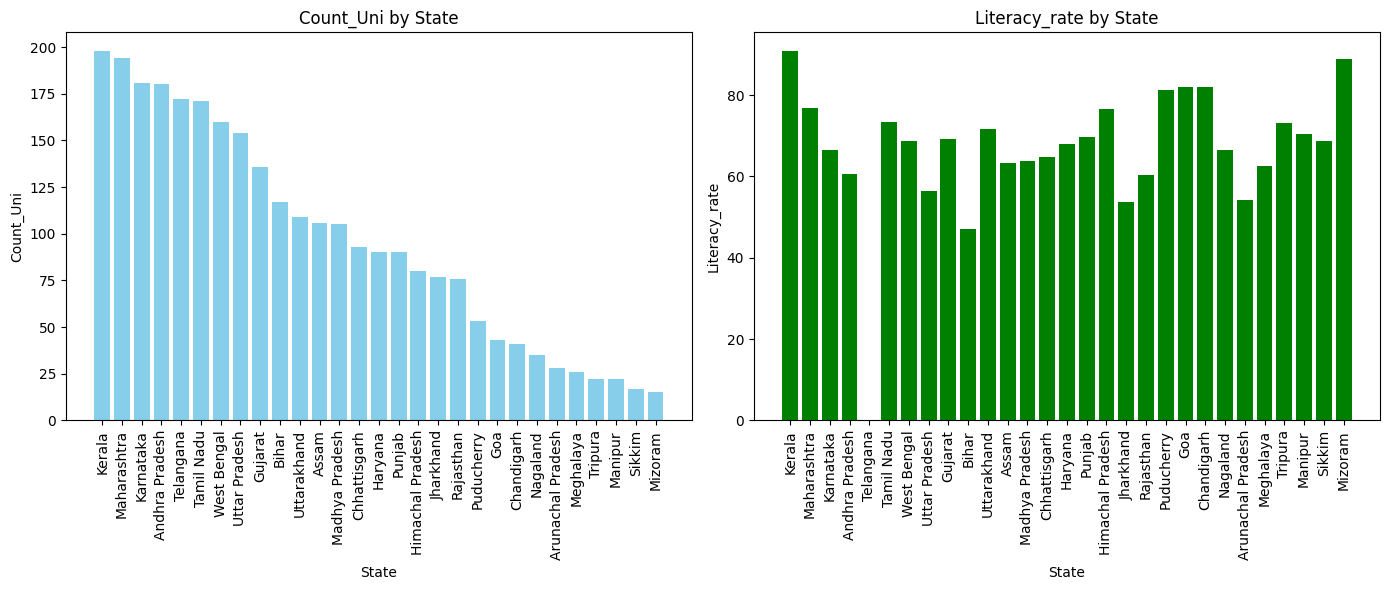

In [137]:

# Create subplots
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

# Plot for Count_Uni
axs[0].bar(merged_df['State'], merged_df['Count_Uni'], color='skyblue')
axs[0].set_xlabel('State')
axs[0].set_ylabel('Count_Uni')
axs[0].set_title('Count_Uni by State')
axs[0].tick_params(axis='x', rotation=90)

# Plot for Literacy_rate
axs[1].bar(merged_df['State'], merged_df['Literacy_rate'], color='green')
axs[1].set_xlabel('State')
axs[1].set_ylabel('Literacy_rate')
axs[1].set_title('Literacy_rate by State')
axs[1].tick_params(axis='x', rotation=90)

# Adjust layout
plt.tight_layout()
plt.show()


**Most** of the states with high literacy rate has more universities, but not all of them, Which is why i am planning to consider population as well.

Text(0.5, 0.98, 'Relationship Between Literacy Rate and Count of Universities')

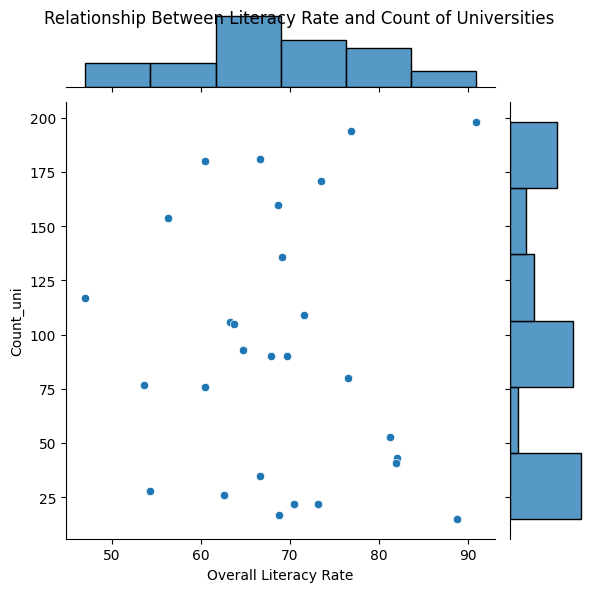

In [138]:
plot = sns.jointplot(y=merged_df["Count_Uni"], x=merged_df['Literacy_rate'])
plot.set_axis_labels(xlabel="Overall Literacy Rate", ylabel="Count_uni")
plot.fig.suptitle("Relationship Between Literacy Rate and Count of Universities")
sns.set_style("whitegrid")
plt.show()


In [139]:
Ind.dtypes

State         object
geometry    geometry
dtype: object

In [140]:
merged_df.dtypes

State               object
Count_Uni            int64
Literacy_rate      float64
_merge            category
Literacy Rural     float64
Literacy Urban     float64
dtype: object

In [141]:
sad = pd.merge(Ind,merged_df, on='State',how='outer')

<Axes: >

[]

[]

Text(0.5, 61.241639266832706, 'max literacy rate: Kerala , min literacy rate: Bihar')

<Axes: >

[]

[]

Text(0.5, 61.24163926683268, 'max Uni : Kerala , min Uni : Mizoram')

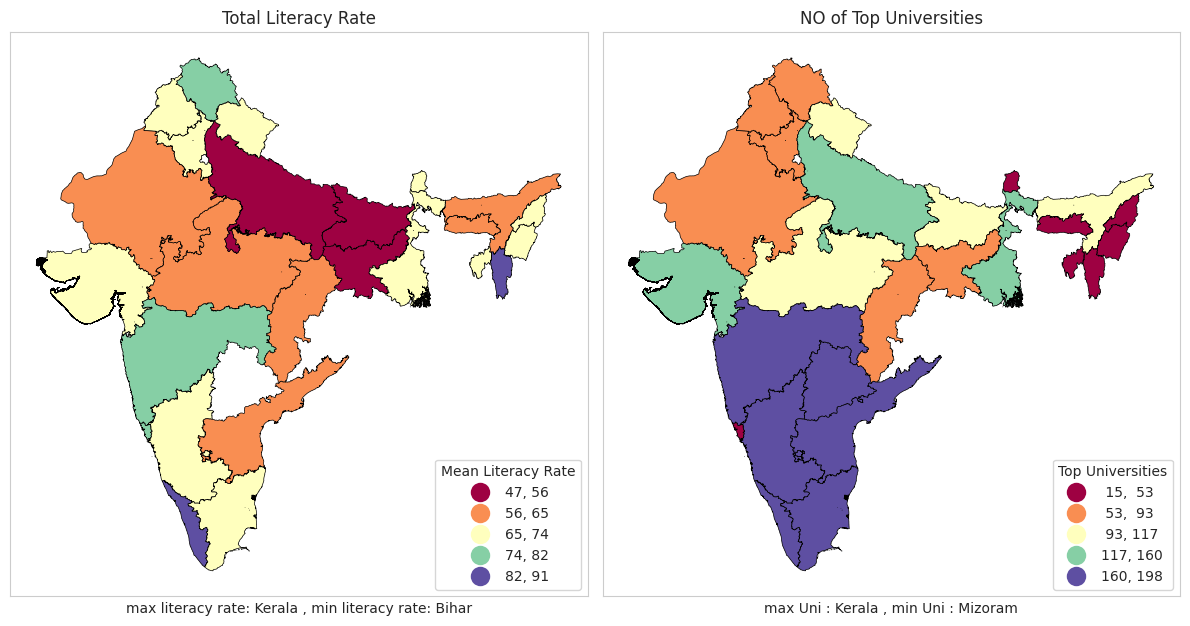

In [142]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

sad.plot(ax=ax1,column='Literacy_rate',legend=True,cmap='Spectral',scheme='natural_breaks',k=5, edgecolor='black',linewidth=0.5,legend_kwds= {"fmt": "{:,.0f}",'loc':'lower right','markerscale':1.4})
leg1 = ax1.get_legend()
leg1.set_title('''Mean Literacy Rate''')
ax1.title.set_text("Total Literacy Rate")
ax1.set_xticks([]) #kills xticks
ax1.set_yticks([]) #kills xticks
ax1.set_xlabel(f"max literacy rate: {sad.loc[sad['Literacy_rate'].idxmax(), 'State']} , min literacy rate: {sad.loc[sad['Literacy_rate'].idxmin(), 'State']}")

sad.plot(ax=ax2,column='Count_Uni',legend=True,cmap='Spectral',scheme='natural_breaks',k=5, edgecolor='black',linewidth=0.5,legend_kwds= {"fmt": "{:,.0f}",'loc':'lower right','markerscale':1.4})
leg1 = ax2.get_legend()
leg1.set_title('''Top Universities''')
ax2.title.set_text("NO of Top Universities")
ax2.set_xticks([]) #kills xticks
ax2.set_yticks([]) #kills xticks
ax2.set_xlabel(f"max Uni : {sad.loc[sad['Count_Uni'].idxmax(), 'State']} , min Uni : {sad.loc[sad['Count_Uni'].idxmin(), 'State']}")


plt.tight_layout()

plt.show()

In [143]:
import pandas as pd

# Assuming df is your DataFrame
correlation_matrix = merged_df[['Literacy_rate', 'Count_Uni']].corr()

# Access the Pearson correlation coefficient
pearson_coefficient = correlation_matrix.loc['Literacy_rate', 'Count_Uni']


In [144]:
print(correlation_matrix)

               Literacy_rate  Count_Uni
Literacy_rate       1.000000  -0.050861
Count_Uni          -0.050861   1.000000


<Axes: >

Text(0.5, 1.0, 'Correlation Matrix Heatmap')

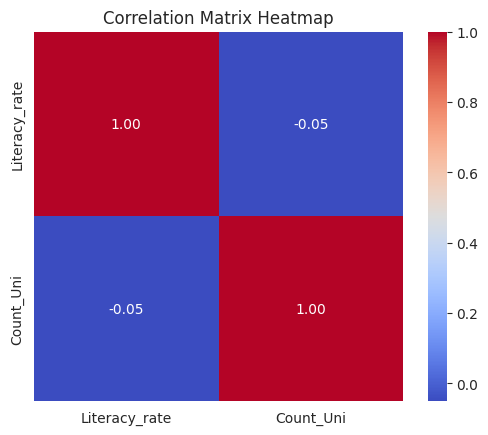

In [145]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your DataFrame
correlation_matrix = merged_df[['Literacy_rate', 'Count_Uni']].corr()

# Create a heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)

# Add title
plt.title("Correlation Matrix Heatmap")

# Show the plot
plt.show()


There is a very weak and negligible negative correlation between "Literacy_rate" and "Count_Uni.

#Will take the population into consideration vs Count of universities in that state

In [146]:
states.dtypes

statename       object
distarea       float64
totalpopul     float64
totpopmale     float64
totpopfema     float64
geometry      geometry
dtype: object

In [147]:
states.rename(columns={'statename': 'State'}, inplace=True)

In [148]:
import pandas as pd

# Merge based on the "State" column
merged_df_1 = pd.merge(merged_df,states, on='State')

In [149]:
merged_df_1.dtypes

State               object
Count_Uni            int64
Literacy_rate      float64
_merge            category
Literacy Rural     float64
Literacy Urban     float64
distarea           float64
totalpopul         float64
totpopmale         float64
totpopfema         float64
geometry          geometry
dtype: object

In [150]:
merged_df_1 = merged_df_1[['State','Count_Uni','Literacy_rate','totalpopul','geometry']]

In [151]:
merged_df_1.dtypes

State              object
Count_Uni           int64
Literacy_rate     float64
totalpopul        float64
geometry         geometry
dtype: object

<Axes: >

Text(0.5, 1.0, 'Correlation Matrix Heatmap')

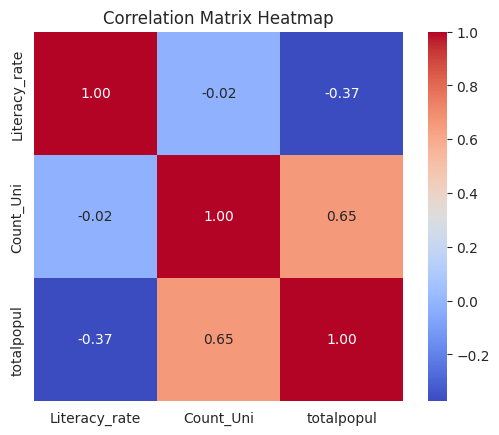

In [152]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your DataFrame
correlation_matrix = merged_df_1[['Literacy_rate', 'Count_Uni','totalpopul']].corr()

# Create a heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)

# Add title
plt.title("Correlation Matrix Heatmap")

# Show the plot
plt.show()

###Relationship between literacy and unemployment

Text(0.5, 0.98, 'Relationship Between Literacy Rate and Unemployment')

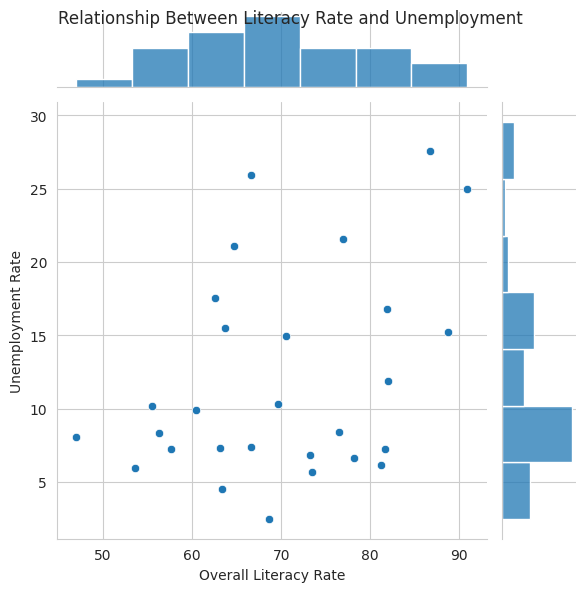

In [153]:
plot = sns.jointplot(y=df_1[" Estimated Unemployment Rate (%)"], x=Literacy_df['Literacy_rate'])
plot.set_axis_labels(xlabel="Overall Literacy Rate", ylabel="Unemployment Rate")
plot.fig.suptitle("Relationship Between Literacy Rate and Unemployment")
sns.set_style("whitegrid")
plt.show()



Income vs unemployment

In [154]:
df_1.dtypes

State                                 object
 Estimated Unemployment Rate (%)     float64
Area                                  object
_merge                              category
geometry                            geometry
dtype: object

In [155]:
df_inc.dtypes

State              object
2019 - LIT        float64
2019 -Poverty     float64
_merge           category
geometry         geometry
2019 INC          float64
2019 - POV        float64
dtype: object

In [156]:
df_1_un = df_1.copy()
df_1_un["geometry"] = df_1_un["geometry"].centroid

<ipython-input-156-527d98224825>:2: UserWarning:

Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.




<Axes: >

<Axes: >

[]

[]

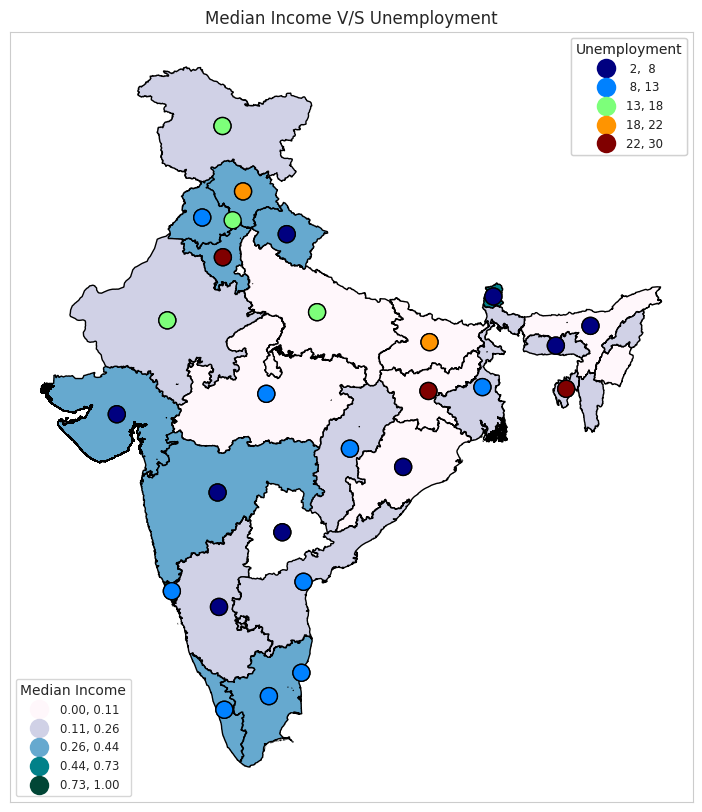

In [157]:
fig, ax = plt.subplots(1, figsize=(12,10))

df_inc.plot(ax=ax,column='2019 INC',legend=True,cmap='PuBuGn',scheme='natural_breaks',k=5,
         edgecolor='black',linewidth=1,legend_kwds= {"fmt": "{:,.2f}",
        'loc':'lower left','title_fontsize':'medium','fontsize':'small','markerscale':1.4})

l1 = ax.get_legend()
l1.set_title('''Median Income''')

df_1_un.plot(ax=ax,column=' Estimated Unemployment Rate (%)',legend=True,cmap='jet',scheme='natural_breaks',k=5,
         edgecolor='black',linewidth=1,legend_kwds= {"fmt": "{:,.0f}",
        'loc':'upper right','title_fontsize':'medium','fontsize':'small','markerscale':1.4},
         markersize = 150)

ax.title.set_text("Median Income V/S Unemployment")
ax.set_xticks([]); ax.set_yticks([])

l2 = ax.get_legend()
l2.set_title('''Unemployment''')



ax.add_artist(l2)
ax.add_artist(l1)

###Unemployment vs Count of top universities Line plot

In [158]:
# Unemployment by count of top universities
norm_UNI = pd.DataFrame()
norm_UNI[' Estimated Unemployment Rate (%)'] = (df_1[' Estimated Unemployment Rate (%)'] - df_1[' Estimated Unemployment Rate (%)'].min()) / (df_1[' Estimated Unemployment Rate (%)'].max() - df_1[' Estimated Unemployment Rate (%)'].min())
norm_UNI['Count_Uni'] = (merged_df_1['Count_Uni'] - merged_df_1['Count_Uni'].min()) / (merged_df_1['Count_Uni'].max() - merged_df_1['Count_Uni'].min())
norm_UNI["State"] = merged_df_1["State"]


In [159]:
import plotly.graph_objects as go
import pandas as pd

# Assuming you have already defined the DataFrame norm_c_i

fig = go.Figure()

fig1=fig.add_trace(go.Scatter(x=norm_UNI["State"], y=norm_UNI['Count_Uni'], mode='lines', name='UNI', line=dict(color='#53D1BA')))
fig1=fig.add_trace(go.Scatter(x=norm_UNI['State'], y=norm_UNI[' Estimated Unemployment Rate (%)'], mode='lines', name='Unemployment', line=dict(color='#D11E5D')))

# Highlight points for "Goa" and "Uttar Pradesh"
highlight_states = ["GOA", "UTTAR PRADESH"]
highlight_indices = norm_UNI[norm_UNI["State"].isin(highlight_states)].index

fig2=fig1.add_trace(go.Scatter(
    x=norm_UNI['State'].iloc[highlight_indices],
    y=norm_UNI['Count_Uni'].iloc[highlight_indices],
    mode='markers',
    marker=dict(color='#53D1BA', size=10),
    name='Highlighted States (Crime)'
))

fig2=fig1.add_trace(go.Scatter(
    x=norm_UNI['State'].iloc[highlight_indices],
    y=norm_UNI[' Estimated Unemployment Rate (%)'].iloc[highlight_indices],
    mode='markers',
    marker=dict(color='#D11E5D', size=10),
    name='Highlighted States (Income)'
))

fig3=fig2.update_layout(
    title='UNI vs Unemployment',
    xaxis=dict(title='States in India'),
    yaxis=dict(title='Normalized Value'),
    yaxis2=dict(title='Normalized income per capita', overlaying='y', side='right'),
    legend=dict(x=0.1, y=1.15, orientation='h'),
    template='plotly_dark'
)

fig3.show()


### Count of uni vs unemployment

In [160]:
df_scat = pd.DataFrame()

In [161]:
df_scat[' Estimated Unemployment Rate (%)'] = df_1[' Estimated Unemployment Rate (%)']
df_scat['Count_Uni'] = merged_df_1['Count_Uni']

df_scat['2019 INC'] = df_inc['2019 INC']

df_scat['State'] = merged_df_1["State"]

Text(0.5, 0.98, 'Relationship Between Count of Uni and Unemployment')

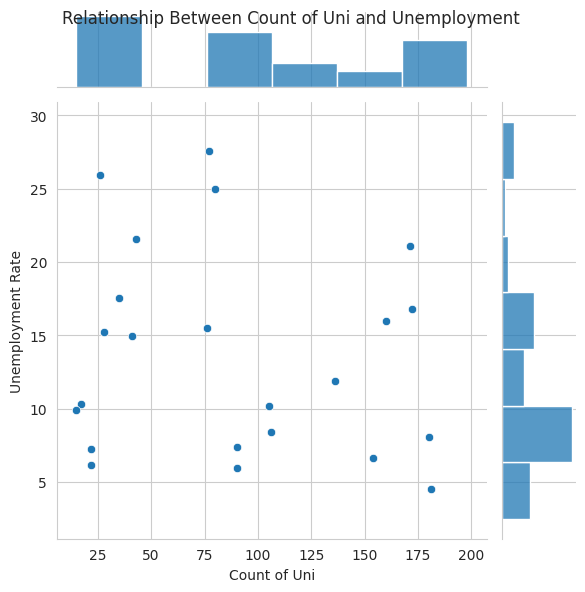

In [162]:
plot = sns.jointplot(y=df_1[" Estimated Unemployment Rate (%)"], x=merged_df_1['Count_Uni'])
plot.set_axis_labels(xlabel="Count of Uni", ylabel="Unemployment Rate")
plot.fig.suptitle("Relationship Between Count of Uni and Unemployment")
sns.set_style("whitegrid")
plt.show()



###Median Income vs literacy

In [163]:
Literacy_df.dtypes

State               object
Literacy_rate      float64
geometry          geometry
_merge            category
Literacy Rural     float64
Literacy Urban     float64
dtype: object

In [164]:
df_LIT_1= Literacy_df.copy()
df_LIT_1["geometry"] = df_LIT_1["geometry"].centroid

<ipython-input-164-fae4e97f729c>:2: UserWarning:

Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.




<Axes: >

<Axes: >

[]

[]

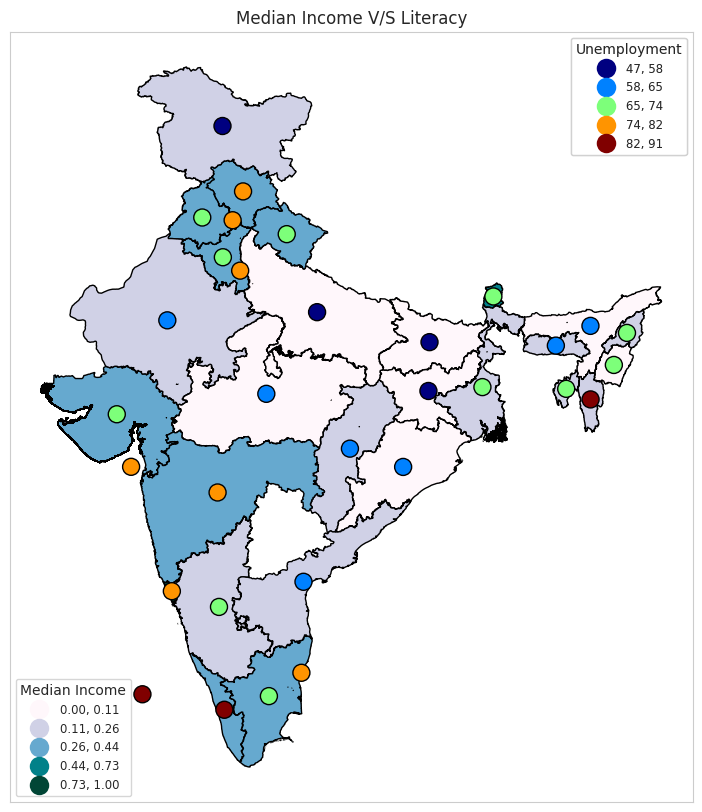

In [165]:
fig, ax = plt.subplots(1, figsize=(12,10))

df_inc.plot(ax=ax,column='2019 INC',legend=True,cmap='PuBuGn',scheme='natural_breaks',k=5,
         edgecolor='black',linewidth=1,legend_kwds= {"fmt": "{:,.2f}",
        'loc':'lower left','title_fontsize':'medium','fontsize':'small','markerscale':1.4})

l1 = ax.get_legend()
l1.set_title('''Median Income''')

df_LIT_1.plot(ax=ax,column='Literacy_rate',legend=True,cmap='jet',scheme='natural_breaks',k=5,
         edgecolor='black',linewidth=1,legend_kwds= {"fmt": "{:,.0f}",
        'loc':'upper right','title_fontsize':'medium','fontsize':'small','markerscale':1.4},
         markersize = 150)

ax.title.set_text("Median Income V/S Literacy")
ax.set_xticks([]); ax.set_yticks([])

l2 = ax.get_legend()
l2.set_title('''Unemployment''')



ax.add_artist(l2)
ax.add_artist(l1)

###CONCLUSION

In my project, I discovered significant relationships among Literacy rate,Unemployment,Income, and Count of universities in various states accross India

Jharkhand: Exhibits high unemployment, and low literacy.

Bihar: Stands out with low income and low literacy.

This projects shows top Universities accross India .Interestingly, Maharashtra has highest number of Universities.

Also plotted a correlation matrix between top universities, population and literacy rate accross states

